# Purpose
#### using data from 2023 and 2024 to do:
1. Analyze the Relationship Between Production Department and Purchasing.
2. Using Carpentry as an example and figure which categories have the most effect on purchasing (70%-30%).
3. Figure the class-A items.
4. calculate ROP for class-A items.

### Import 

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline




### Get the data 

In [37]:
PATH_2024 = '2024/purchasings 2024.xlsx'
PATH_2023 = '2023/purchasings 2023.xlsx'


In [38]:
cols = ['Item_No.', 'Item_name', 'Categories','Posting_Date', 'Vendors', 'Document_No.', 'Quantity', 'Unit_of_Measure', 'Item_Category_Code']
purchase_data_1 = pd.read_excel(PATH_2024)
purchase_data_1 = purchase_data_1[cols]
purchase_data_1.Posting_Date = pd.to_datetime(purchase_data_1.Posting_Date)


In [39]:
purchase_data_2 = pd.read_excel(PATH_2023)
purchase_data_2 = purchase_data_2[cols]
purchase_data_2.Posting_Date = pd.to_datetime(purchase_data_2.Posting_Date)


In [40]:
purchase_data = pd.concat([purchase_data_1,purchase_data_2],axis=0)
purchase_data

,Item_No.,Item_name,Categories,Posting_Date,Vendors,Document_No.,Quantity,Unit_of_Measure,Item_Category_Code
0,RN-200-106-003,Drawing on mirrors رسم علي المرايا,Mirror&Glass,2024-01-01,11000207,PRC-11039648,1.00,MTR,RN
1,FM-COSMOS-SWF63-16,ASTRID,Fabric,2024-01-01,VDN-11000326,PRC-11039416,11.00,MTR,FM
2,FM-FORESTHI-610,نابوك,Fabric,2024-01-01,VDN-11000437,PRC-11039412,135.20,MTR,FM
3,RN-200-103-002,STRAIGHT POLISHED EDGE 06mm,Mirror&Glass,2024-01-01,11000207,PRC-11039648,18.52,MTR,RN
4,RN-100-100-009,GARDENIA MIRROR 6mm,Mirror&Glass,2024-01-01,11000207,PRC-11039648,2.98,SQM,RN
...,...,...,...,...,...,...,...,...,...
6505,RC-100-111-002,05 CM خشب واوة مجفف,Solid Wood,2023-12-31,VDN-11000807,PRC-11039366,835.10,CBC,RC
6506,RC-101-104-001,AB0F100291 SONAE MDF MR CARB2-3660x1830x18mm,MDF,2023-12-31,11000004,PRC-11039368,84.00,SHT,RC
6507,FM-OPALINE-05,شانيل بيج,Fabric,2023-12-31,VDN-11001177,PRC-11039272,9.50,PCS,FM
6508,FM-SW-60004,hadab,Fabric,2023-12-31,VDN-11001200,PRC-11039317,90.00,MTR,FM


after merge data we have 11833 purchasing records, we will go deep in data to get the insight from it 

### 1-Analyze the Relationship Between Production Department and Purchasing 
To understand the contribution of each production department to the purchasing process, we created a pie chart. The chart is based on the value counts of purchase orders categorized by production department, showcasing the distribution of purchasing activities across departments.

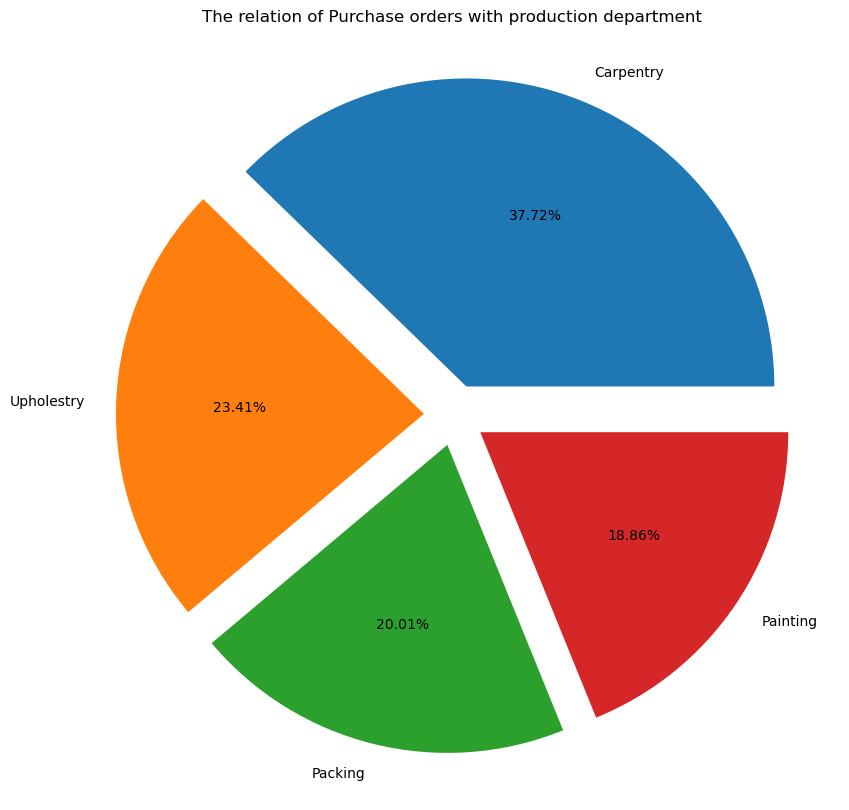

In [41]:
purchase_data.Item_Category_Code = purchase_data.Item_Category_Code.str.replace('FM', 'Upholestry').replace(   
    'RU','Upholestry').replace('RC', 'Carpentry').replace('RP', 'Painting').replace('RN','Packing')
distribution_wc=purchase_data.Item_Category_Code.value_counts()[:-1]
plt.figure(figsize=(10,10))
plt.pie(distribution_wc.values, labels=distribution_wc.index, explode = [0.1]*len(distribution_wc), autopct='%1.2f%%')
plt.title('The relation of Purchase orders with production department ')
plt.show()

This chart shows that Carpentry has the most purchase orders, then upholestry and packing then finally painting 

### 2-What is the percentage of [Veneer, metal, MDF, etc] order from all carpentry orders ?

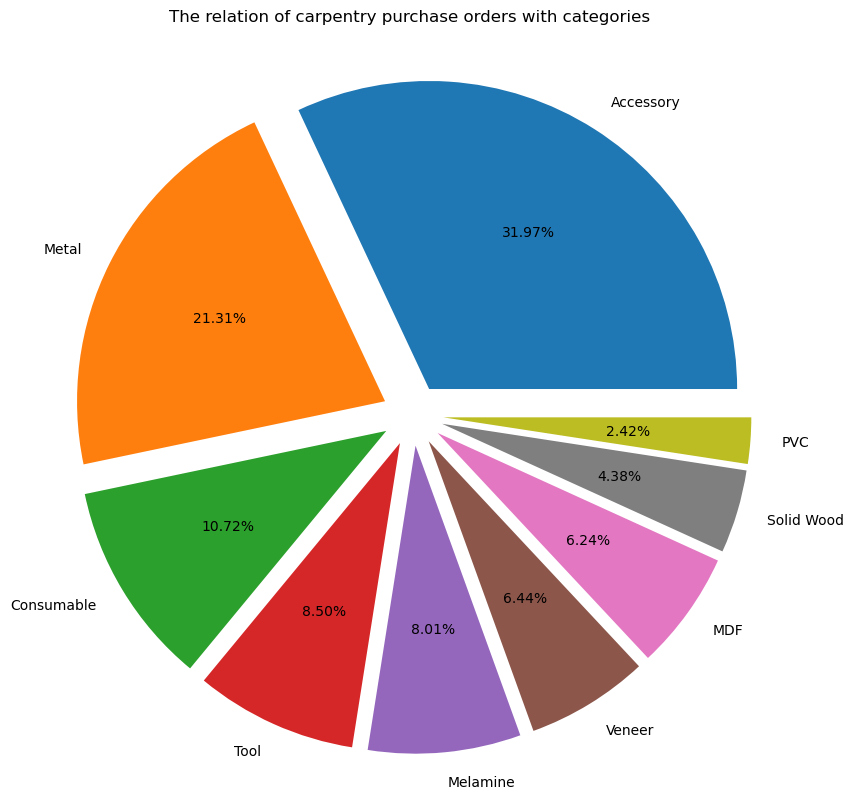

In [42]:
car_purchasing = purchase_data[purchase_data.Item_Category_Code == 'Carpentry']
categories_carpentry=car_purchasing.Categories.value_counts()[:-1]
plt.figure(figsize=(10,10))
plt.pie(categories_carpentry.values, labels=categories_carpentry.index, explode= [0.1]*len(categories_carpentry), autopct='%1.2f%%')
plt.title('The relation of carpentry purchase orders with categories ')
plt.show()


this digram is showing that 70% of orders are related to [Accessories, metals, consumable and tools] & and remaining [Melamine, Veneer, MDF, Solid wood and PVC] are representing around 30% 

#### Visulize purchasing qty for the raw material ['Melamine','MDF', 'Veneer', 'Solid Wood' ] vs time, 

first graph all of raw material vs time to see if there a correlation between them, then I plotted each category in graph.

Noted that in perfect senario the line will be horizontal or with small slope since all that represent the purchasing orders.

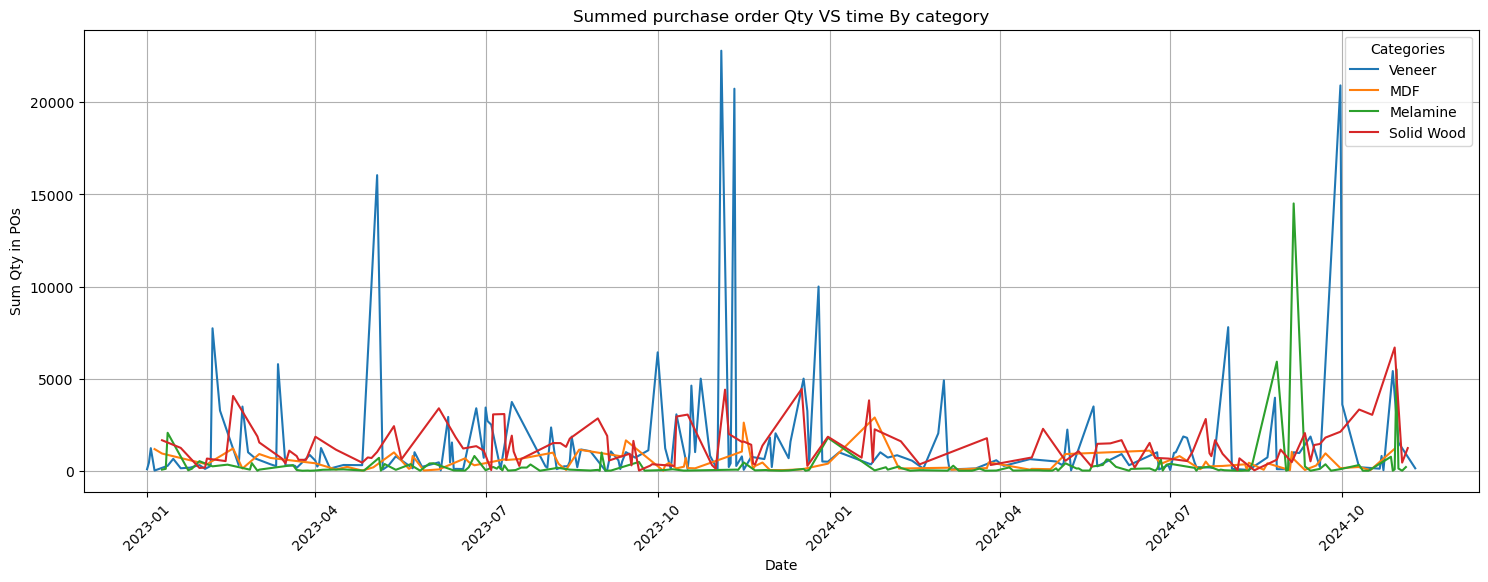

In [43]:
wood_list = ['Melamine','MDF', 'Veneer', 'Solid Wood' ]
wood_purchasing = car_purchasing[car_purchasing.Categories.isin(wood_list)]
wood_purchasing = wood_purchasing.groupby(by= ['Posting_Date', 'Categories'])['Quantity'].agg('sum').reset_index()

plt.figure(figsize=(18,6))
sns.lineplot(data=wood_purchasing, x= 'Posting_Date', y ='Quantity', hue=  'Categories' )
plt.title('Summed purchase order Qty VS time By category')
plt.xlabel('Date')
plt.ylabel('Sum Qty in POs')
plt.xticks(rotation=45)
plt.grid()

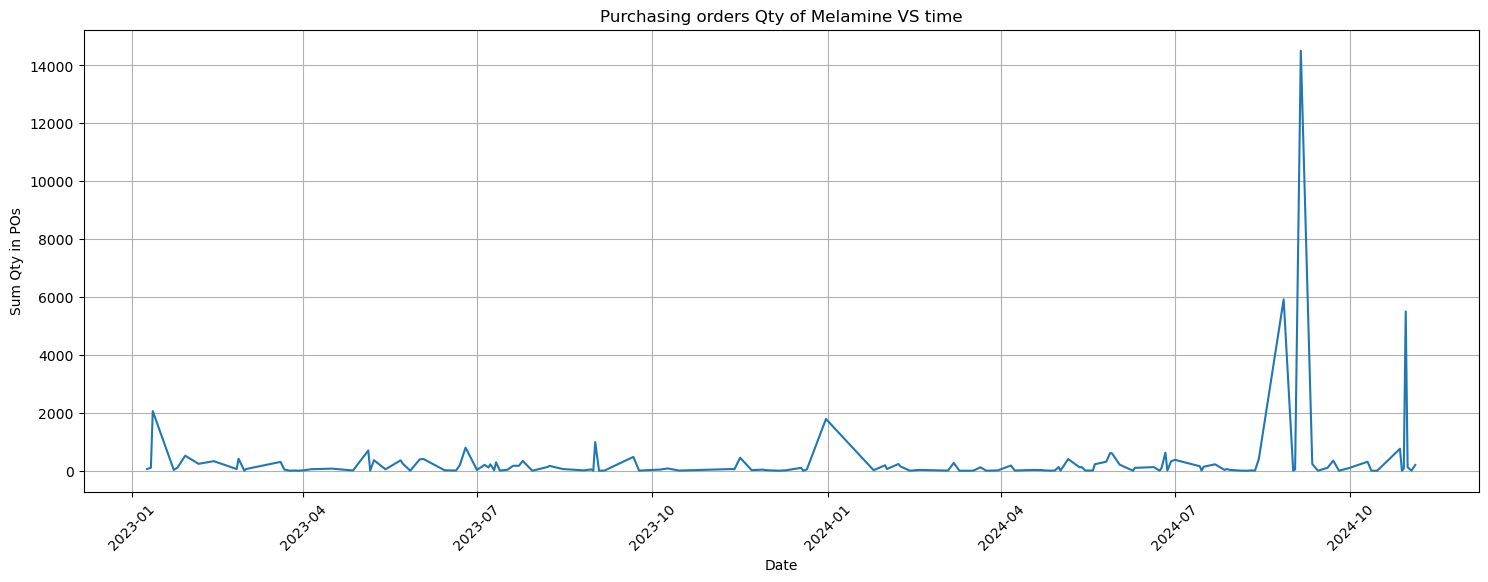

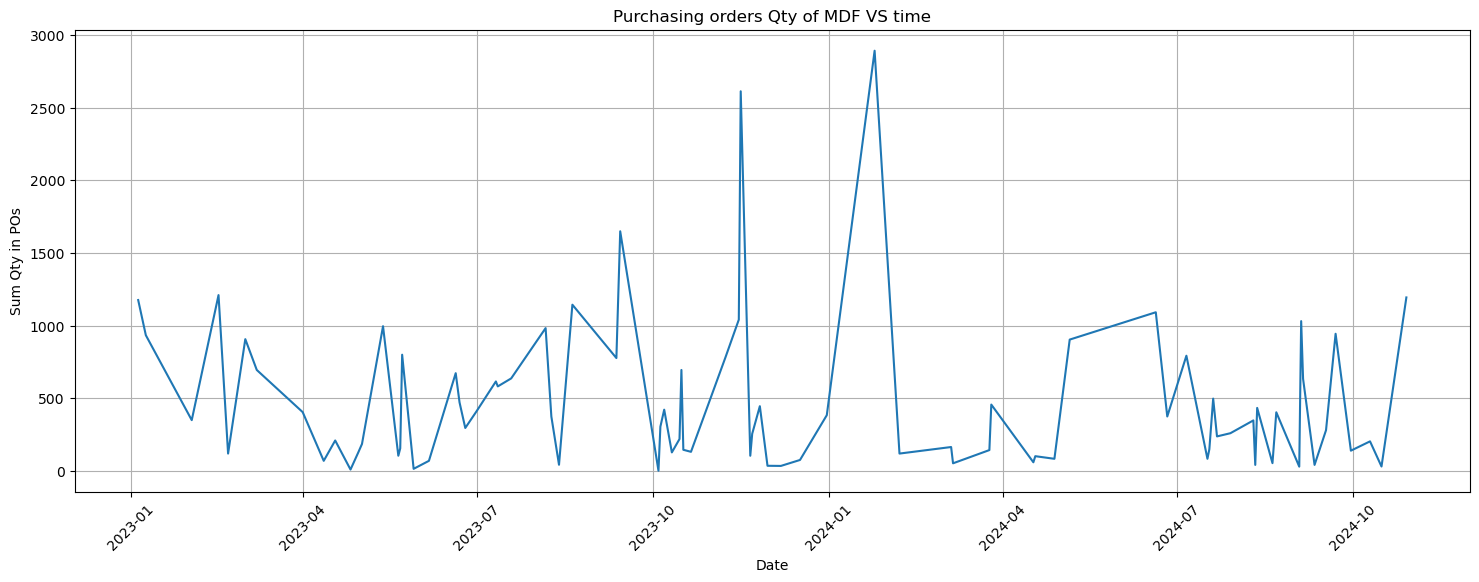

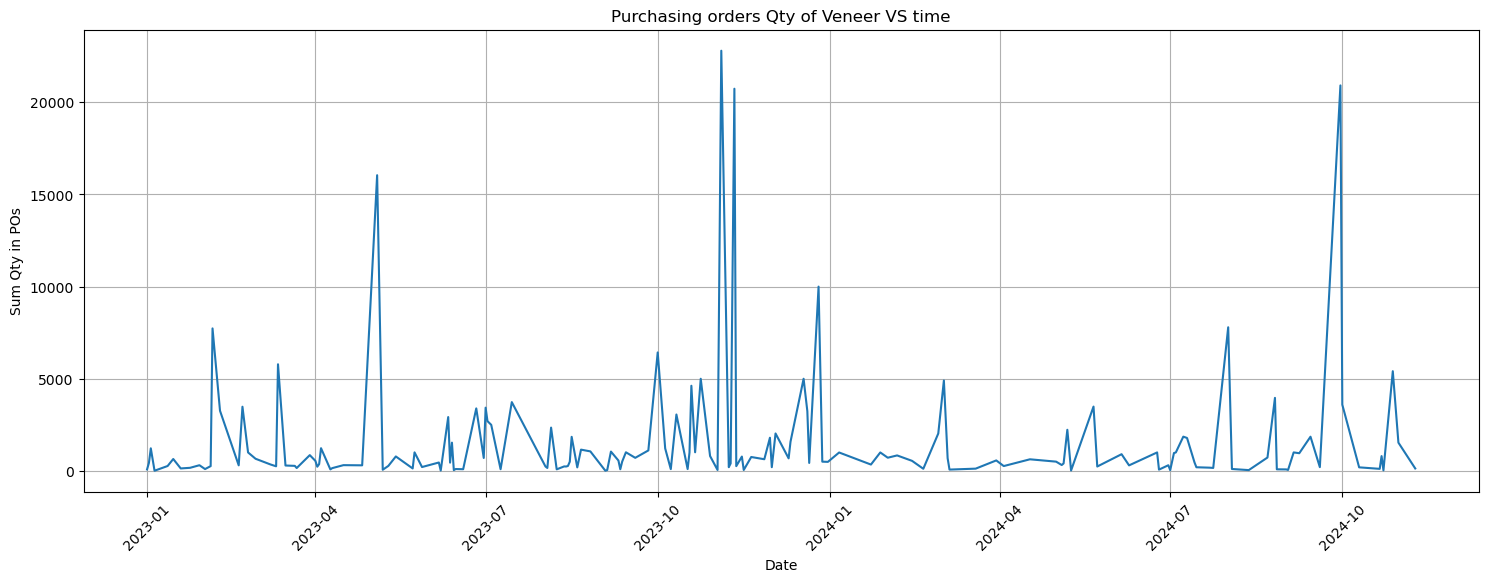

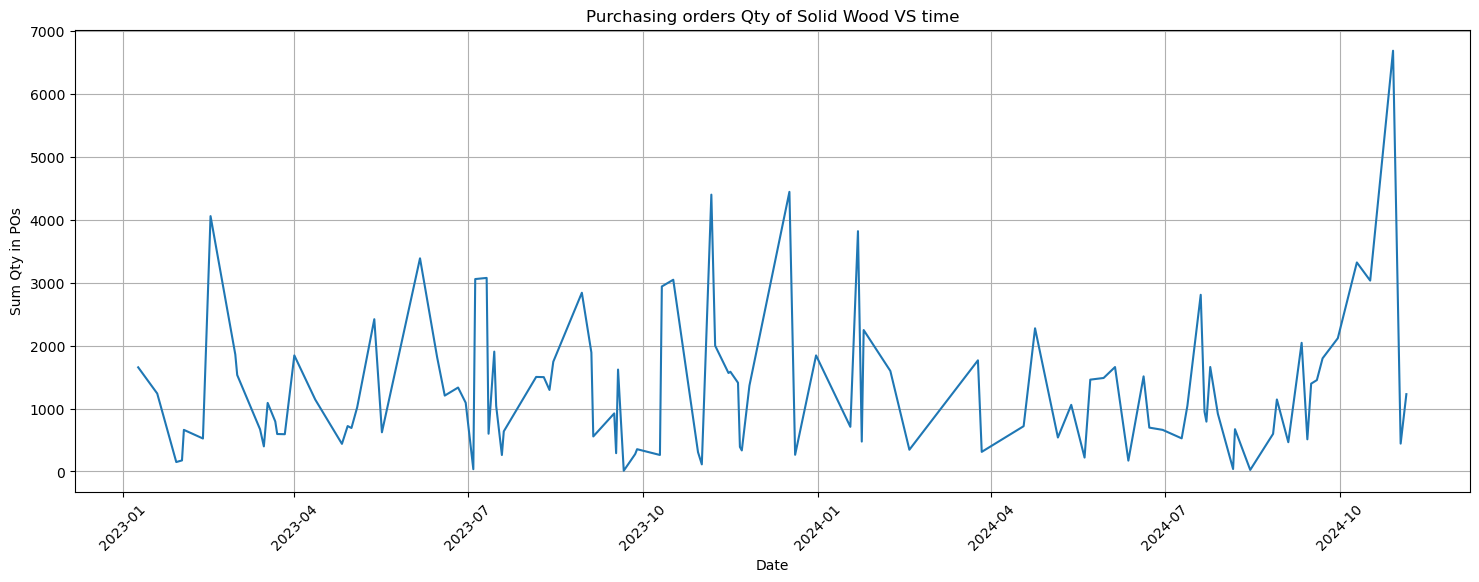

In [45]:
for cat in wood_list:
    plt.figure(figsize=(18,6))
    sns.lineplot(data =wood_purchasing[wood_purchasing.Categories ==cat], x= 'Posting_Date', y ='Quantity' )
    plt.title(f'Purchasing orders Qty of {cat} VS time') 
    plt.xticks(rotation=45) 
    plt.xlabel('Date')
    plt.ylabel('Sum Qty in POs')
    plt.grid()


the variance in these graphs is explained by variaty, like in solid wood Shouh which is standard and Mahogni which is for Project 

#### Using Boxplot for same data to showing the upper, lower and medain, also it is better in showing changing in variance between categories


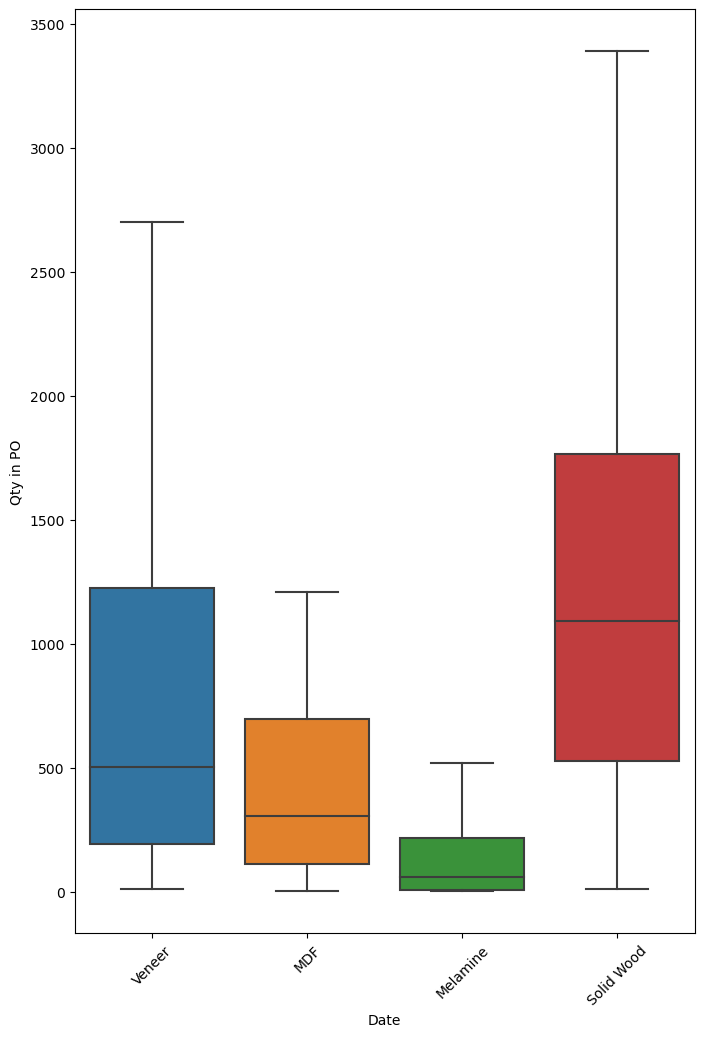

In [11]:
plt.figure(figsize=(8,12))
sns.boxplot(data=wood_purchasing, x= 'Categories', y ='Quantity',showfliers=False  )
plt.xlabel('Date')
plt.ylabel('Qty in PO')
plt.xticks(rotation=45)
plt.show()

Solid wood has the high variance between alls, then the veneer and that make a good sence, which inducator for we need more data so we understand better that variance from type of veneers or required qty or both.

### 3- let's see the most common items during all period Get the class-A items 

To do that we will get what represent 80% of items based on [repeating in purchasing orders and qty in purchasing orders] then get the Intersection between them.

I will start with MDF and solid wood as pilot, and after confirmation we can do the approved method on all.

In [46]:
def get_common(data, category, precentage):
    data = data[data['Categories']== category]
    data['Cumulative_persentage_Qty'] = data.sort_values('Total_Qty',ascending=False)['Total_Qty'].cumsum()/data['Total_Qty'].sum()*100
    data['Cumulative_persentage_count'] = data.sort_values('Order_Count',ascending=False)['Order_Count'].cumsum()/data['Order_Count'].sum()*100
    qty_data = data[data.Cumulative_persentage_Qty <precentage]
    count_data = data[data.Cumulative_persentage_count<precentage]
    codes = pd.merge(qty_data['Item_No.'],count_data['Item_No.'], on='Item_No.')
    merge_data = data[data['Item_No.'].isin(codes['Item_No.'])]
    return data, codes, merge_data

In [47]:
car_purchased_item = (    car_purchasing
                      .groupby(['Item_No.','Item_name','Categories']).agg(Total_Qty =('Quantity','sum'), Order_Count= ('Item_No.','size'))
                      .reset_index().sort_values(by='Order_Count', ascending=False).reset_index(drop=True)
                     ).drop(index=[0,1]).reset_index(drop=True)
car_purchased_item


,Item_No.,Item_name,Categories,Total_Qty,Order_Count
0,RC-100-106-002,خشب سويدى رابع,Solid Wood,42556.33719,37
1,RC-200-101-001,قشرة جوز تركى مسنن طبيعى,Veneer,9982.57500,35
2,RC-505-100-005,رزين خام لعمل طبعات حفر,Consumable,1042.16283,30
3,RC-101-100-007,366*183*18 -B ام دى اف تايلاندى,MDF,5324.00000,30
4,RC-100-104-002,05 CM خشب زان المانى مجفف,Solid Wood,18789.49100,26
...,...,...,...,...,...
1701,RC-206-105-003,وجه مسكه ستيل,Accessory,10.00000,1
1702,RC-206-105-002,شمسية قفل باب دهبى مطفى معتق,Accessory,2.00000,1
1703,RC-206-104-015,AKADA - 0220032 -اشارة قفل باب حمام اسود,Accessory,1.00000,1
1704,RC-206-104-012,cylinder adapter wc lock وصلة سندر قفل حمام,Accessory,200.00000,1


##### After we getting the common items, or calss-A for each category, let's visulize the data, we will create 3 charts
1. line chart for all purchasing for all items during the full period.
2. line charts for each item during the full period.
3. line charts for each item comparing each year.

 

##### MDF

In [48]:
mdf_dict= {
    '244*122*22 -S ام دى اف تايلاندى':'MDF-22-S',
    '366*183*18 -B ام دى اف تايلاندى':'MDF-18-B',
    '244*122*18 -S ام دى اف تايلاندى':'MDF-18-S',
    '366*183*12 -B ام دى اف تايلاندى':'MDF-12-B',
    '244*122*12 -S ام دى اف تايلاندى':'MDF-12-S',
    '366*183*09 -B ام دى اف تايلاندى':'MDF-9-B',
    '244*122*09 -S ام دى اف تايلاندى':'MDF-9-S',
    '244*122*03 -S ام دى اف تايلاندى':'MDF-3-S',
    '244*122*18MM-S ام دى اف ضد الرطوبة':'MRMDF-18-S',
    '366*183*18MM-B ام دى اف ضد الرطوبة':'MRMDF-18-B',
    'AB0F100291 SONAE MDF MR CARB2-3660x1830x18mm':'Sonae MRMDF-18-B',
    'AB0F103231 SONAE MDF MR CARB2-2440x1220x18mm':'Sonae MRMDF-18-S'

    
}
mdf_data, mdf_common_codes, mdf_merge_code =get_common(car_purchased_item
                                                       , 'MDF', 80)
MDF_common_data = car_purchasing[car_purchasing['Item_No.'].isin(mdf_common_codes['Item_No.'])]
MDF_common_data = MDF_common_data.groupby(['Item_No.','Item_name', 'Categories', 'Posting_Date'])['Quantity'].agg('sum').reset_index()
for key, value in mdf_dict.items():
    MDF_common_data.Item_name = MDF_common_data.Item_name.str.replace(key, value)
    
print("The Class-A of MDF are: \n")
MDF_common_data[['Item_No.', 'Item_name']].drop_duplicates().reset_index(drop=True)


The Class-A of MDF are: 



,Item_No.,Item_name
0,RC-101-100-006,MDF-22-S
1,RC-101-100-007,MDF-18-B
2,RC-101-100-008,MDF-18-S
3,RC-101-100-009,MDF-12-B
4,RC-101-100-010,MDF-12-S
5,RC-101-100-011,MDF-9-B
6,RC-101-100-012,MDF-9-S
7,RC-101-100-015,MDF-3-S
8,RC-101-102-001,MRMDF-18-S
9,RC-101-102-002,MRMDF-18-B


As usual we will plot all purchasing order for class-A items in one graph so we got if there any relation between them 

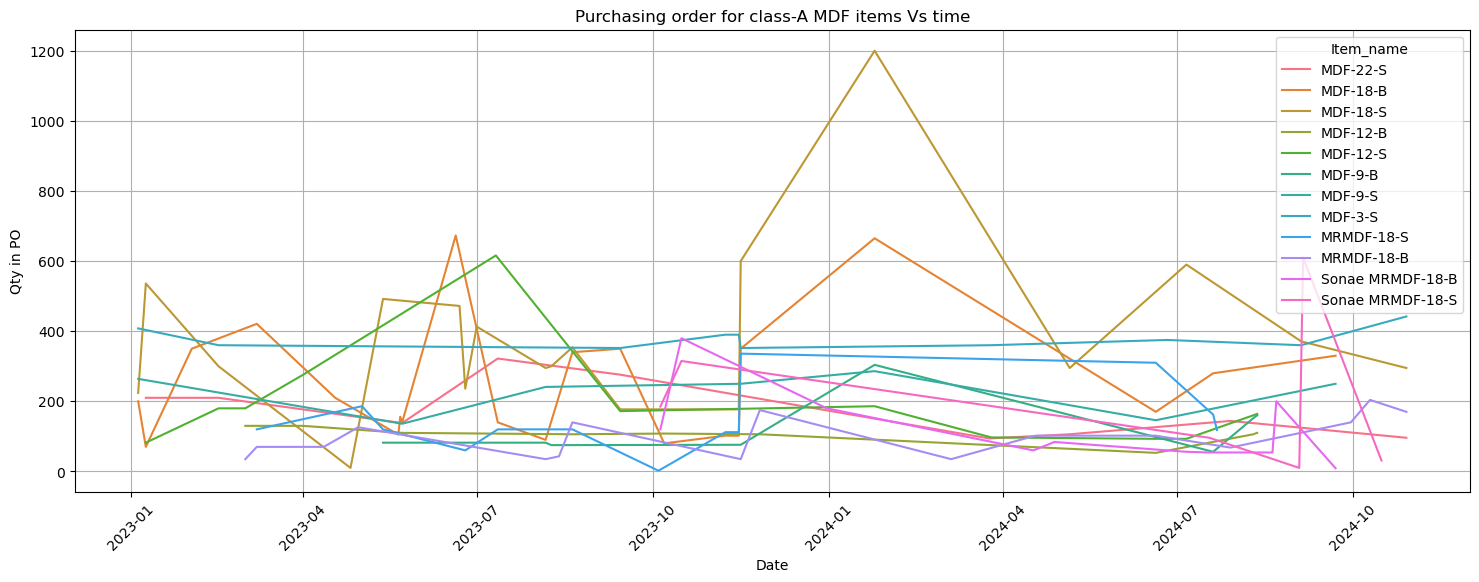

In [49]:
plt.figure(figsize=(18,6))
sns.lineplot(data=MDF_common_data, x= 'Posting_Date', y ='Quantity', hue=  'Item_name' )
plt.title('Purchasing order for class-A MDF items Vs time')
plt.xlabel('Date')
plt.ylabel('Qty in PO')
plt.xticks(rotation=45)
plt.grid()

then we will plot a graph for each item Vs time, and please remember the best senario small slope in the line

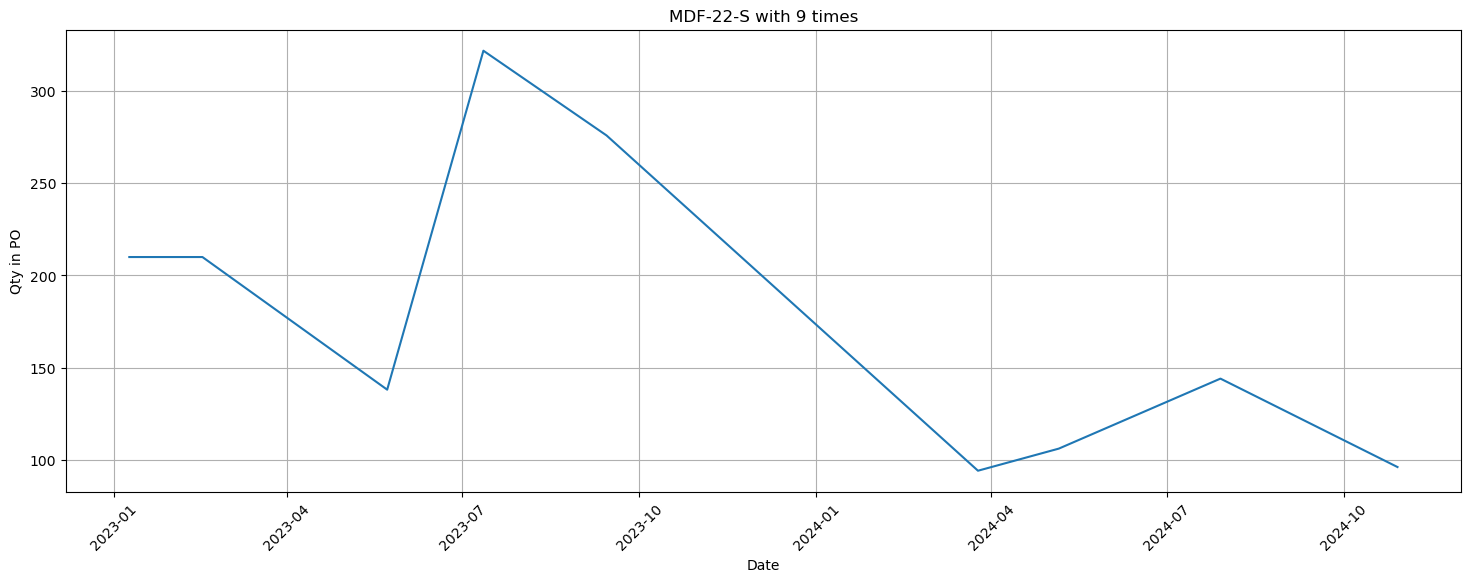

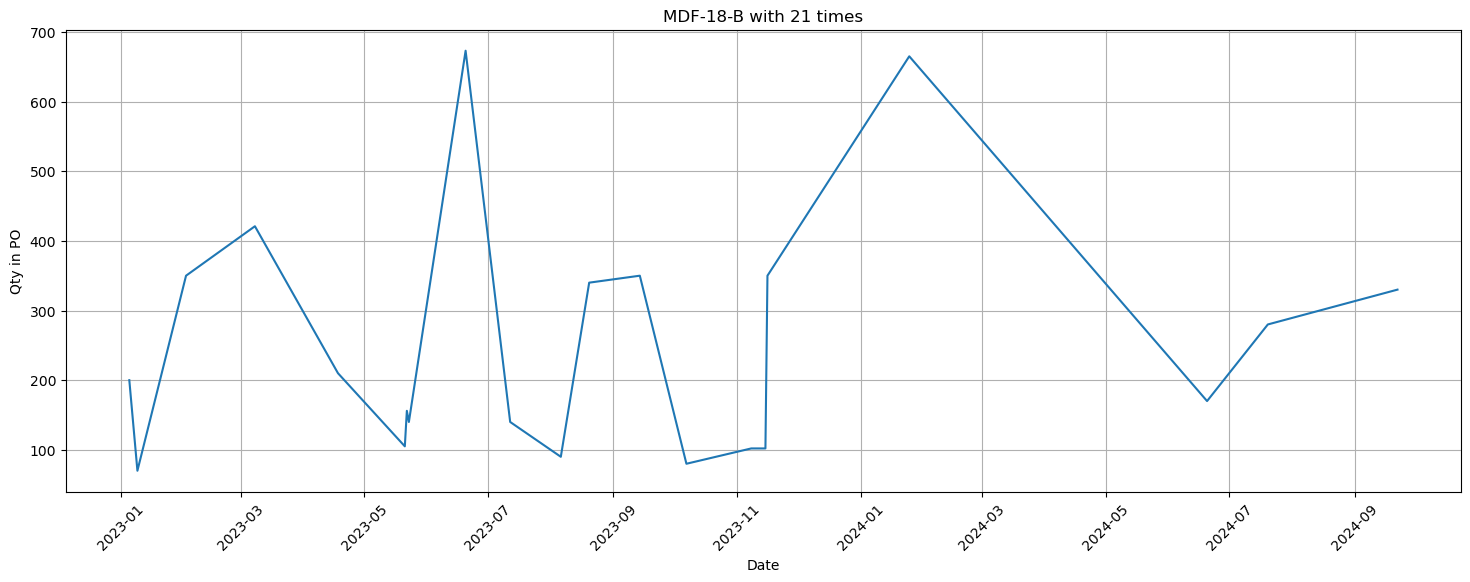

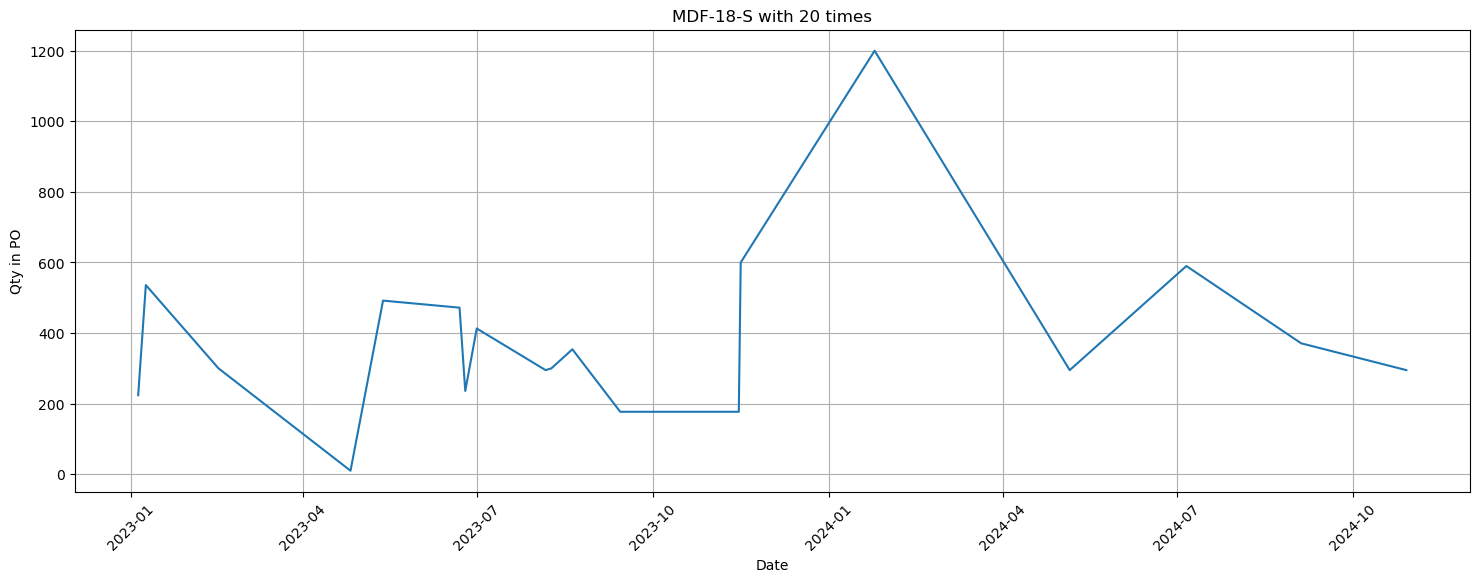

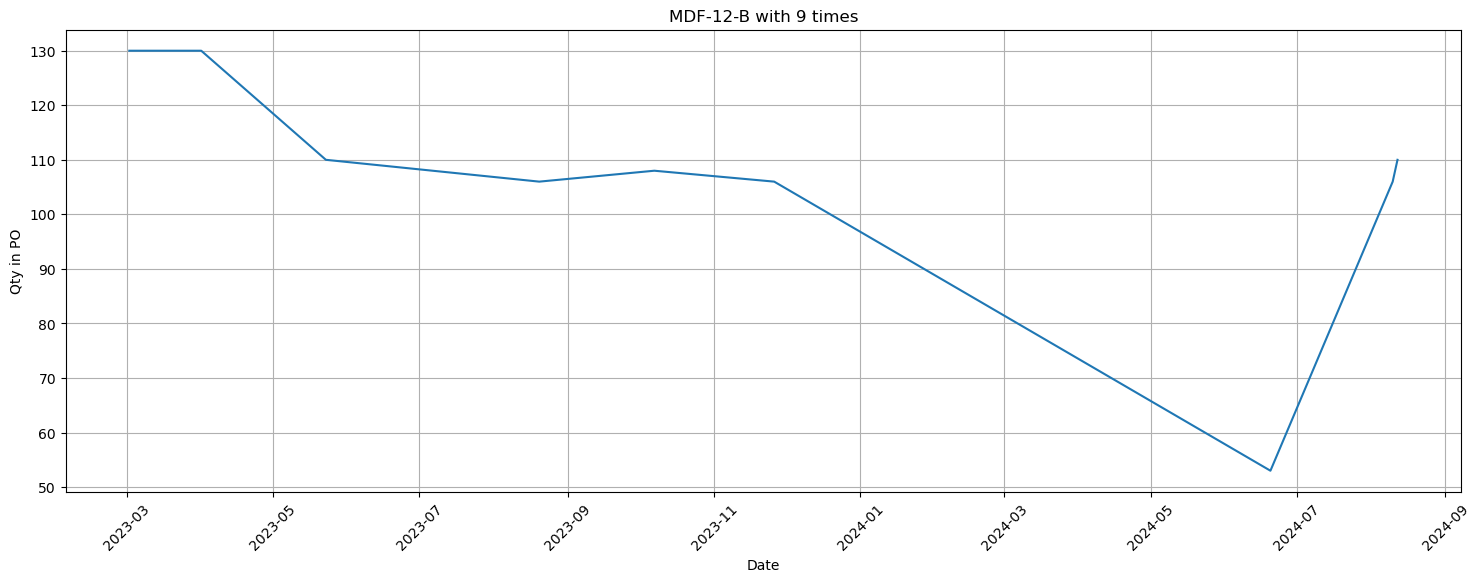

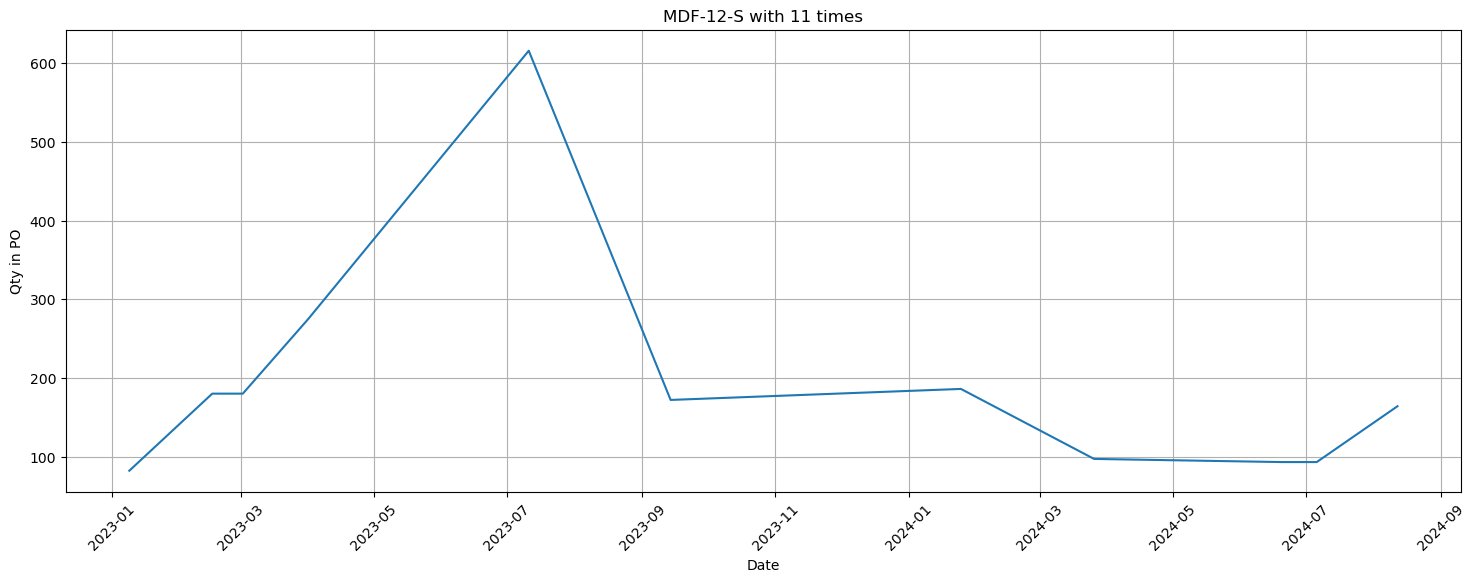

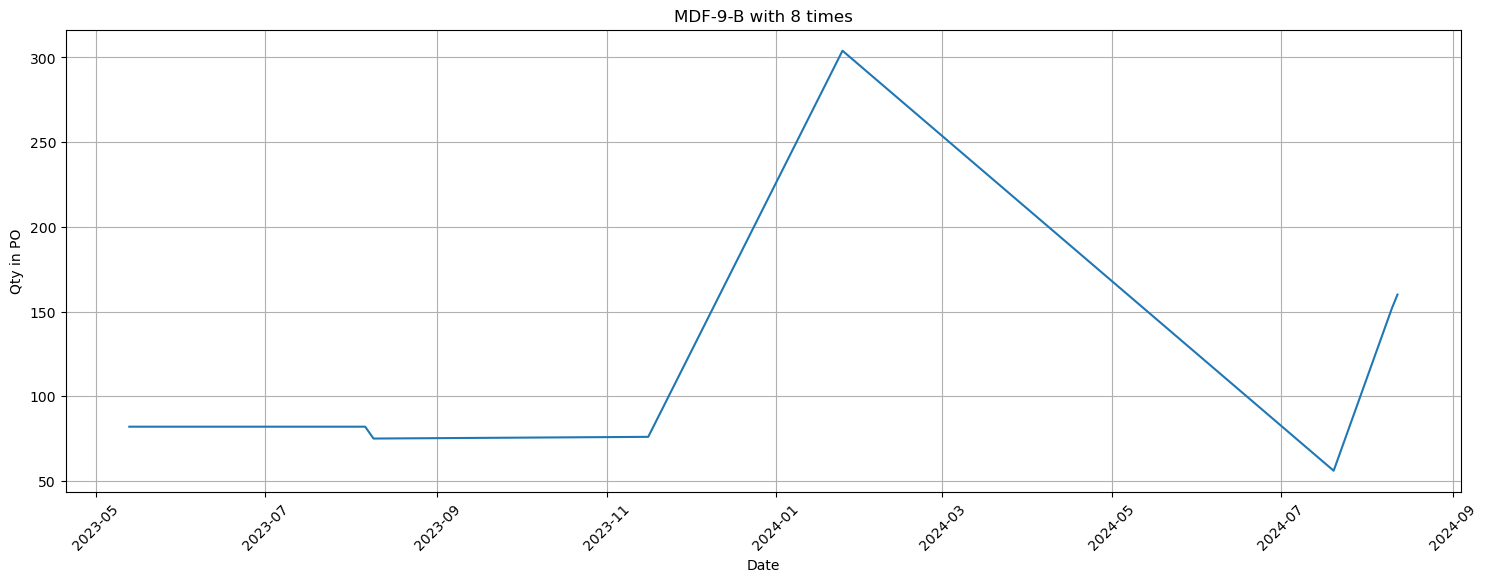

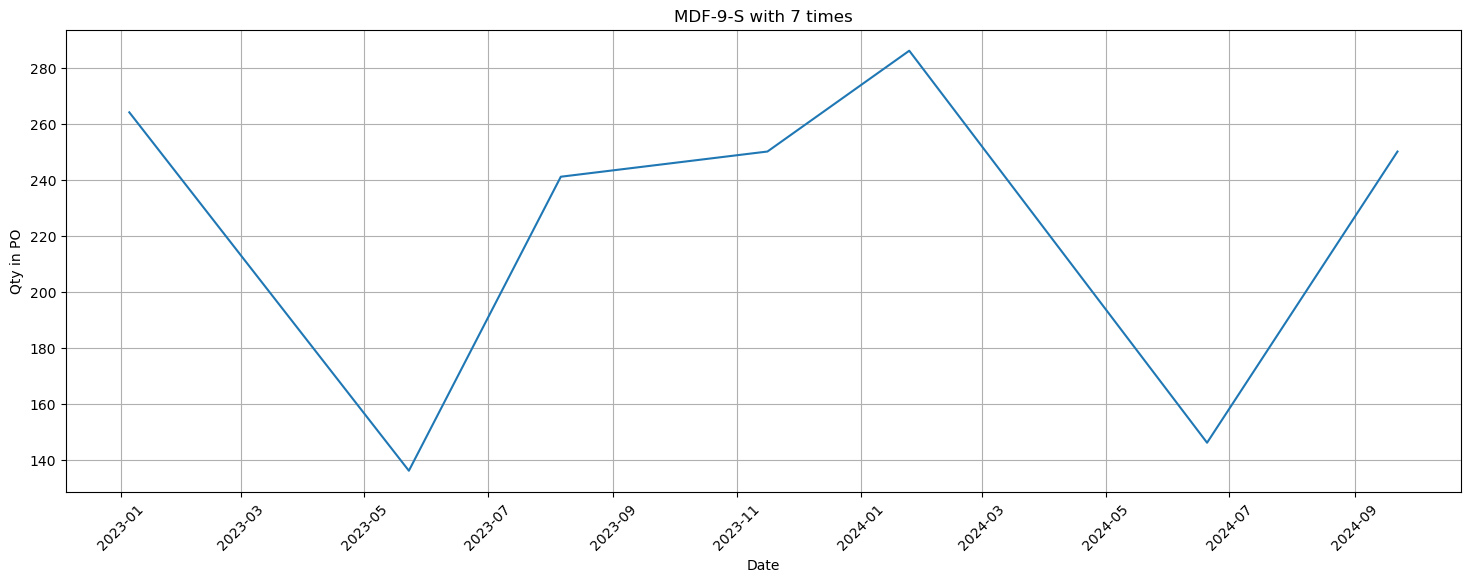

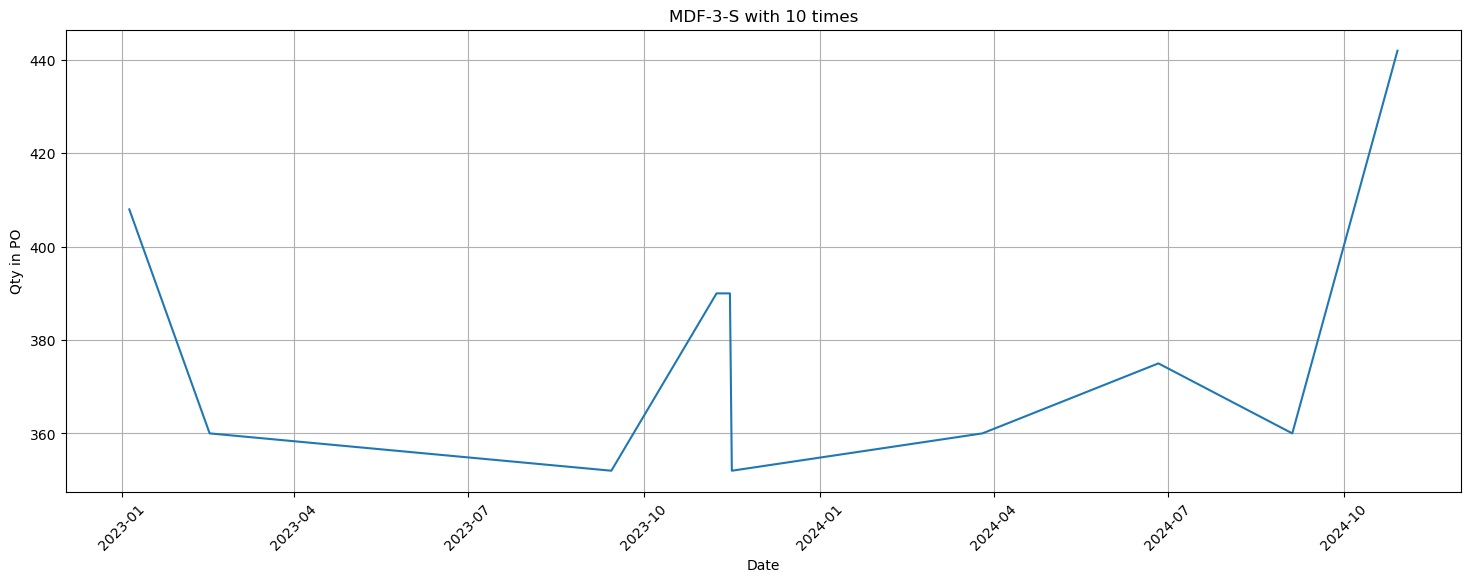

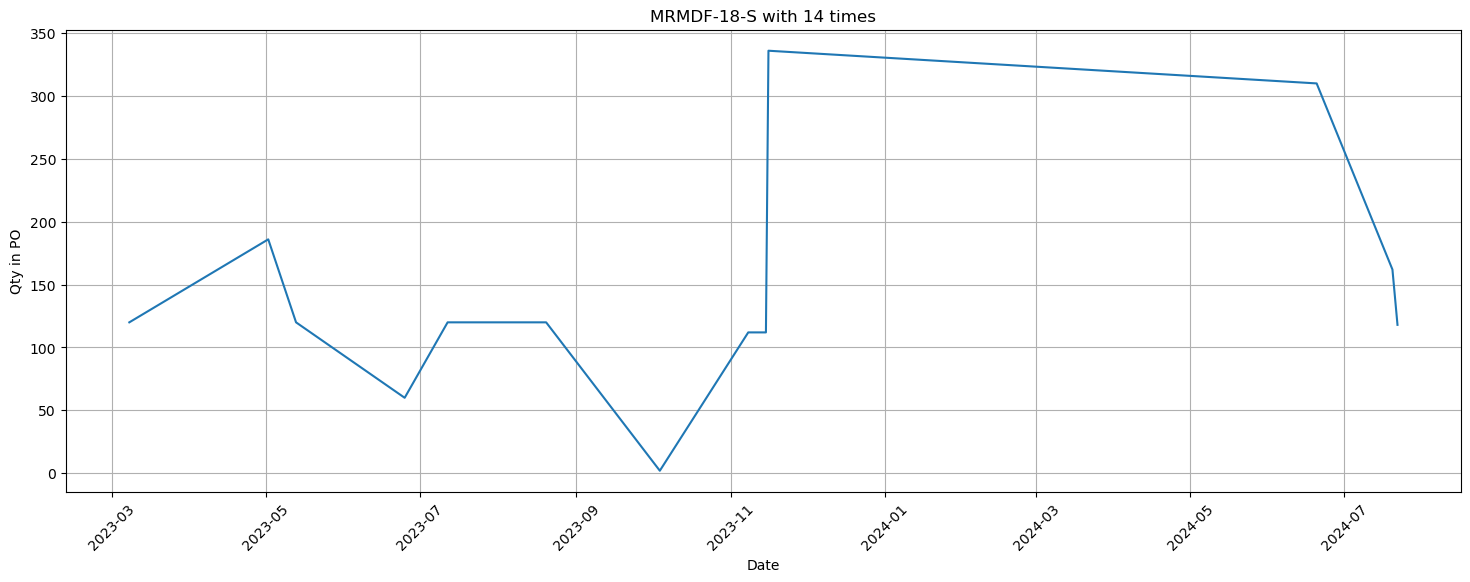

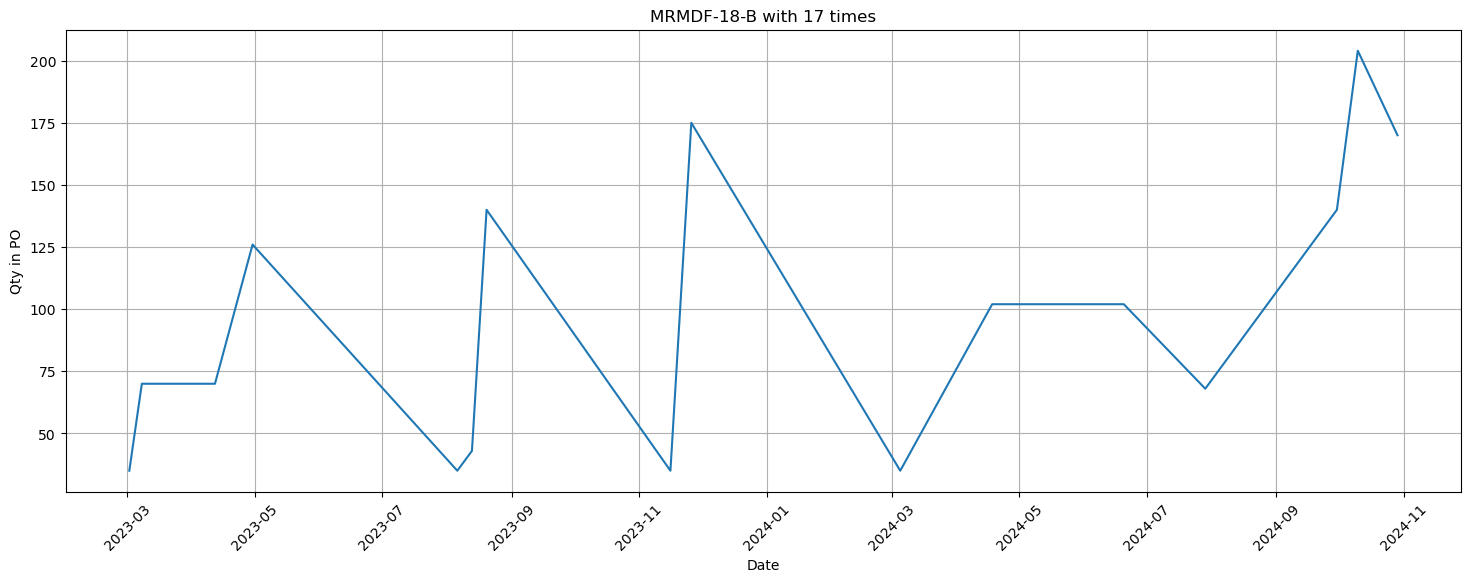

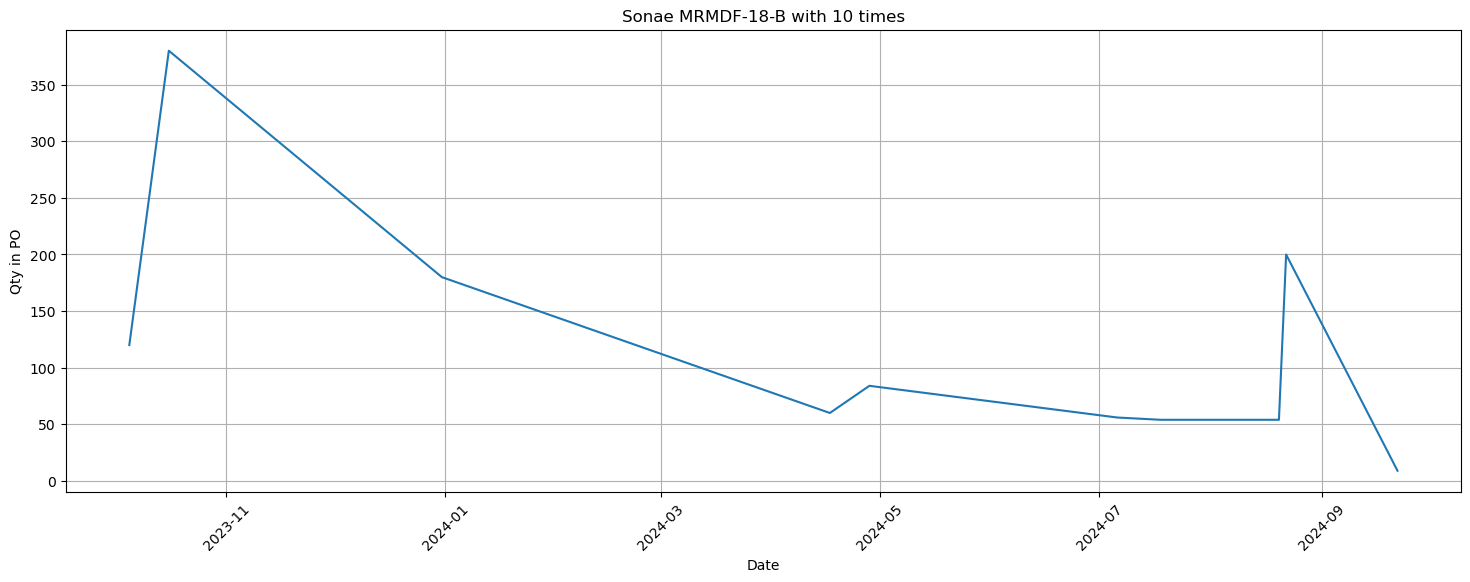

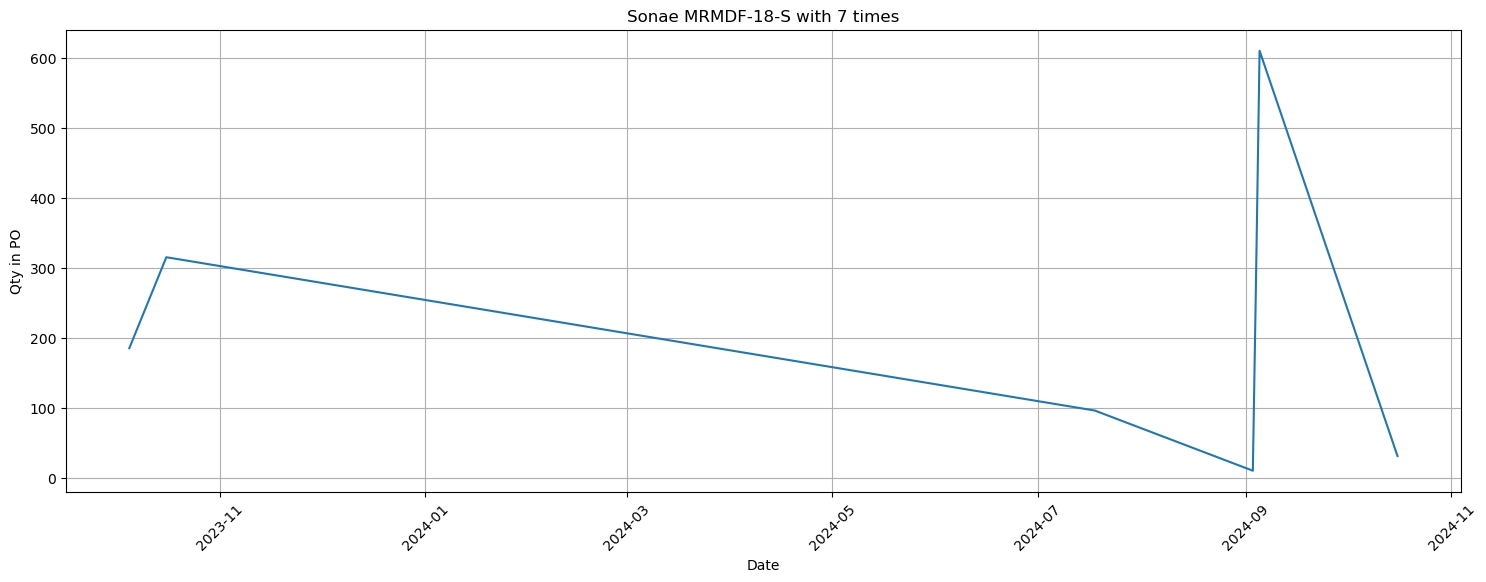

In [50]:
for item in mdf_dict.values():
    plt.figure(figsize=(18,6))
    sns.lineplot(data =MDF_common_data[MDF_common_data.Item_name ==item], x= 'Posting_Date', y ='Quantity' )
    plt.title(f'{item} with {MDF_common_data[MDF_common_data.Item_name ==item].shape[0]} times') 
    plt.xticks(rotation=45) 
    plt.xlabel('Date')
    plt.ylabel('Qty in PO')
    plt.grid()

one of the reson that make big change in slope is seasonality if we have specific time per year when purchsing increase or decrease, let's check if we have seasonality in any of these items 

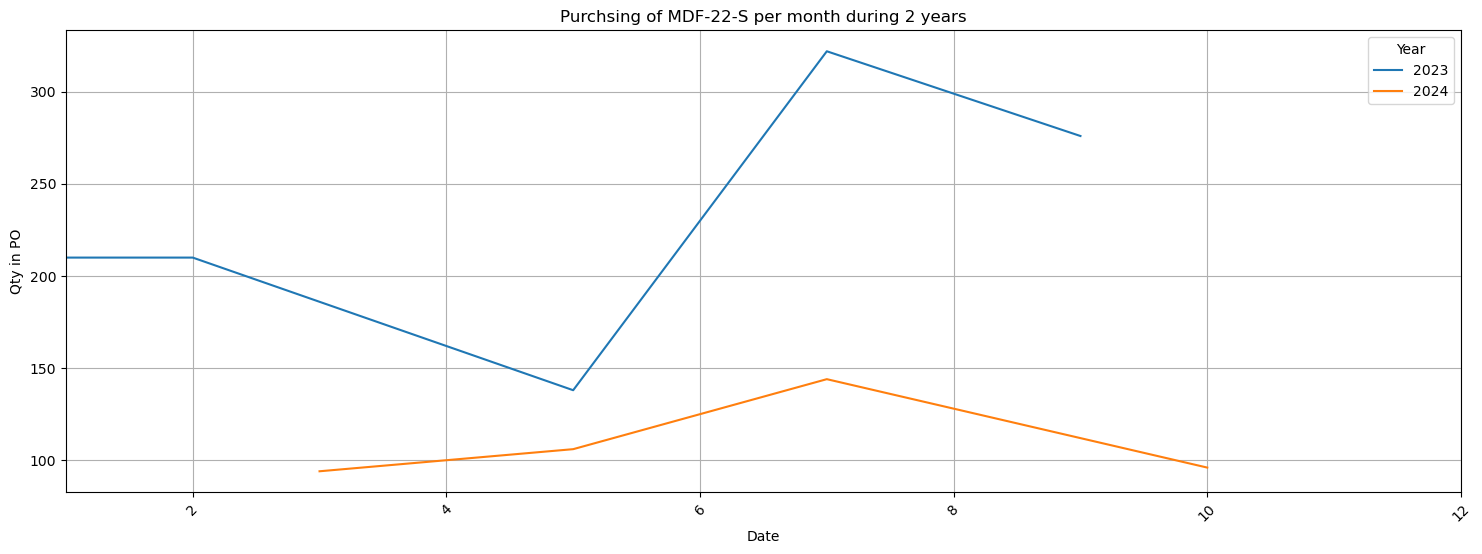

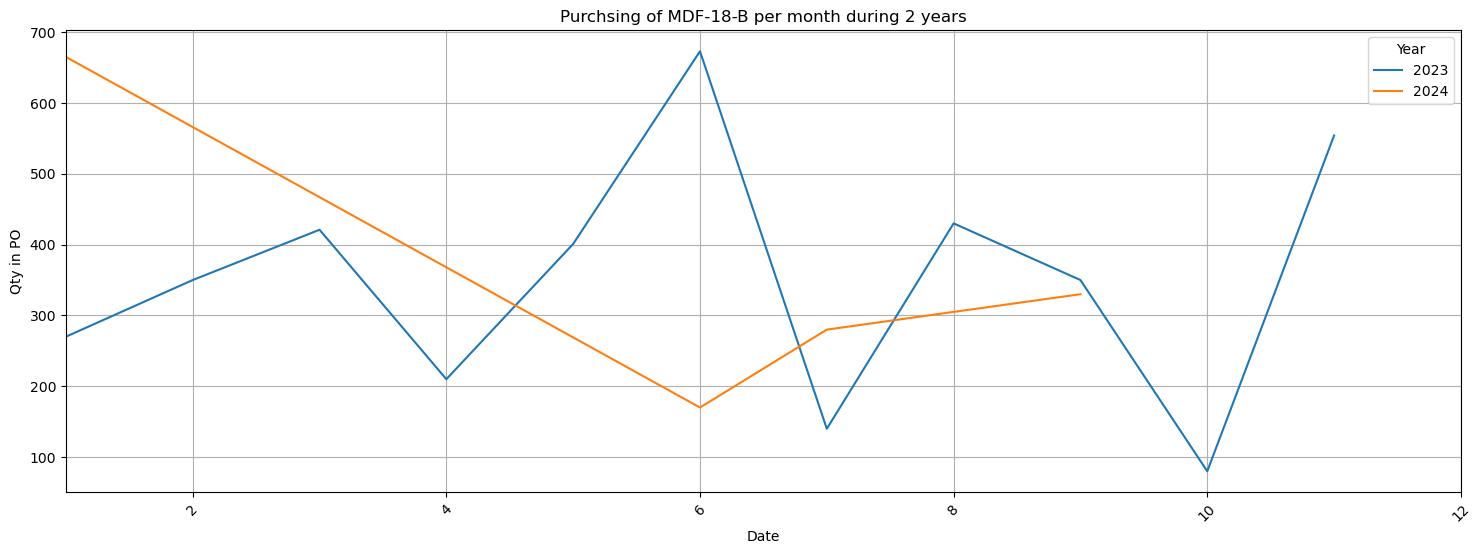

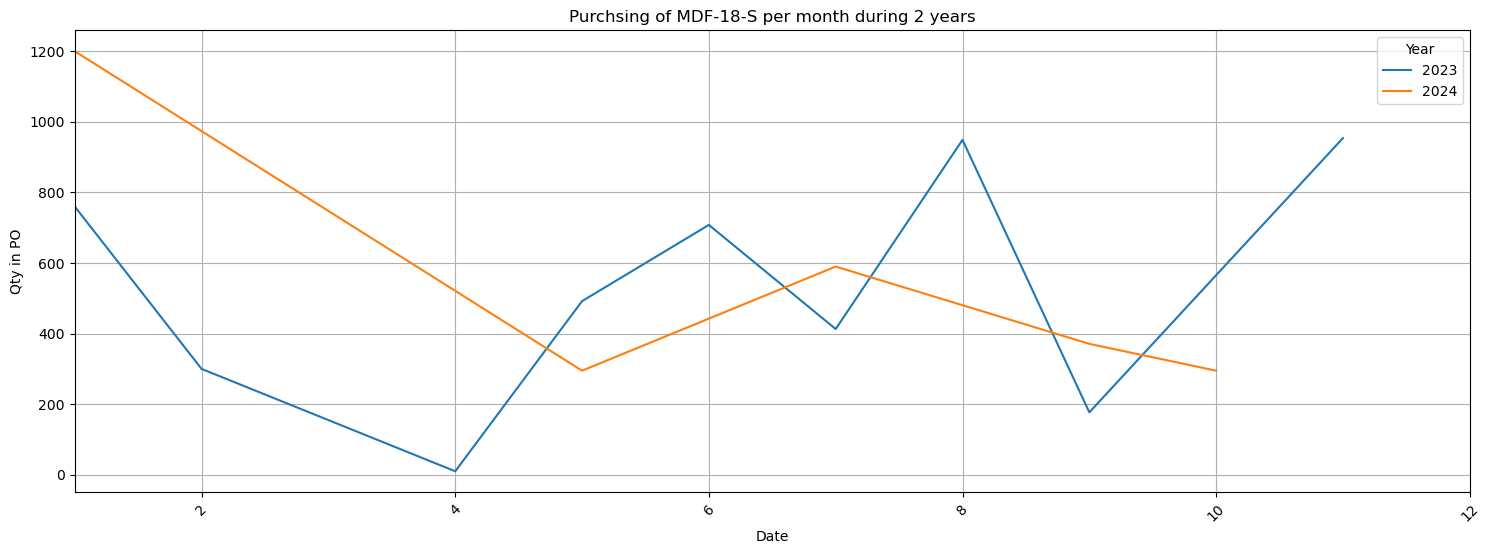

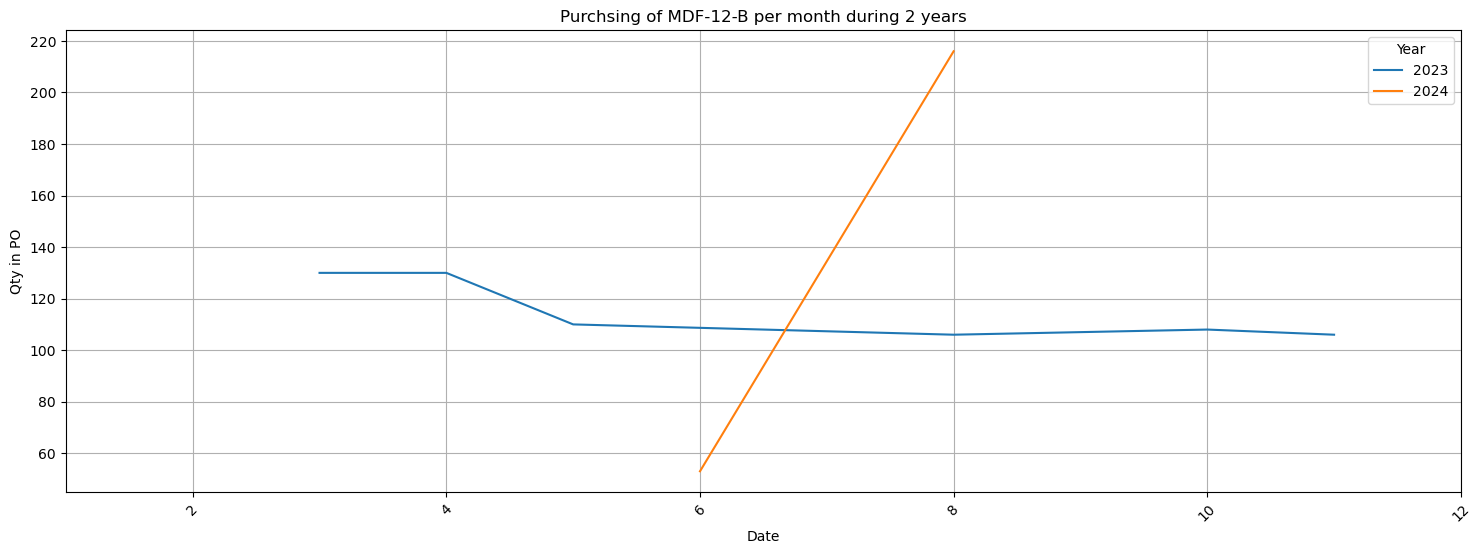

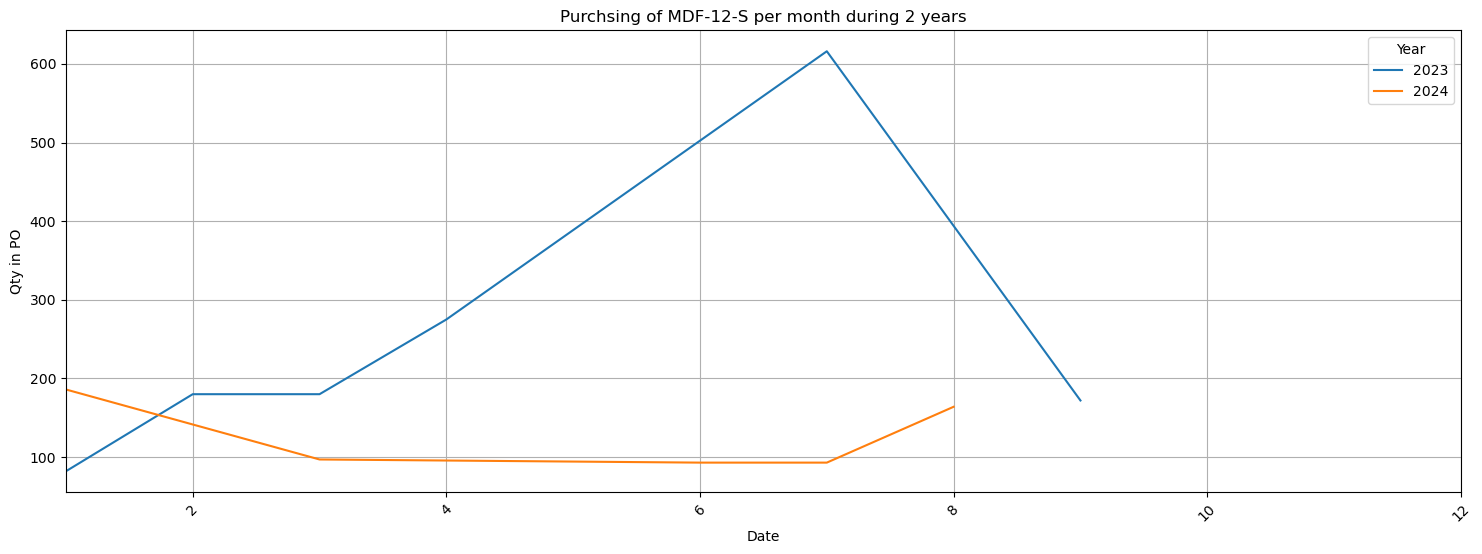

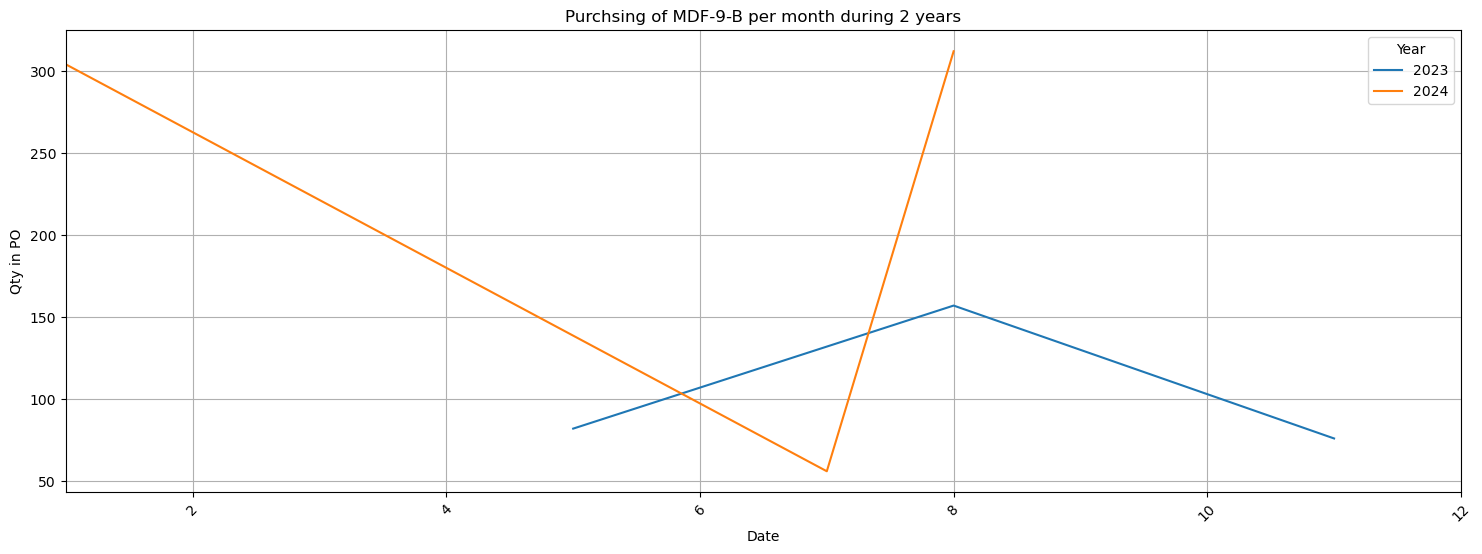

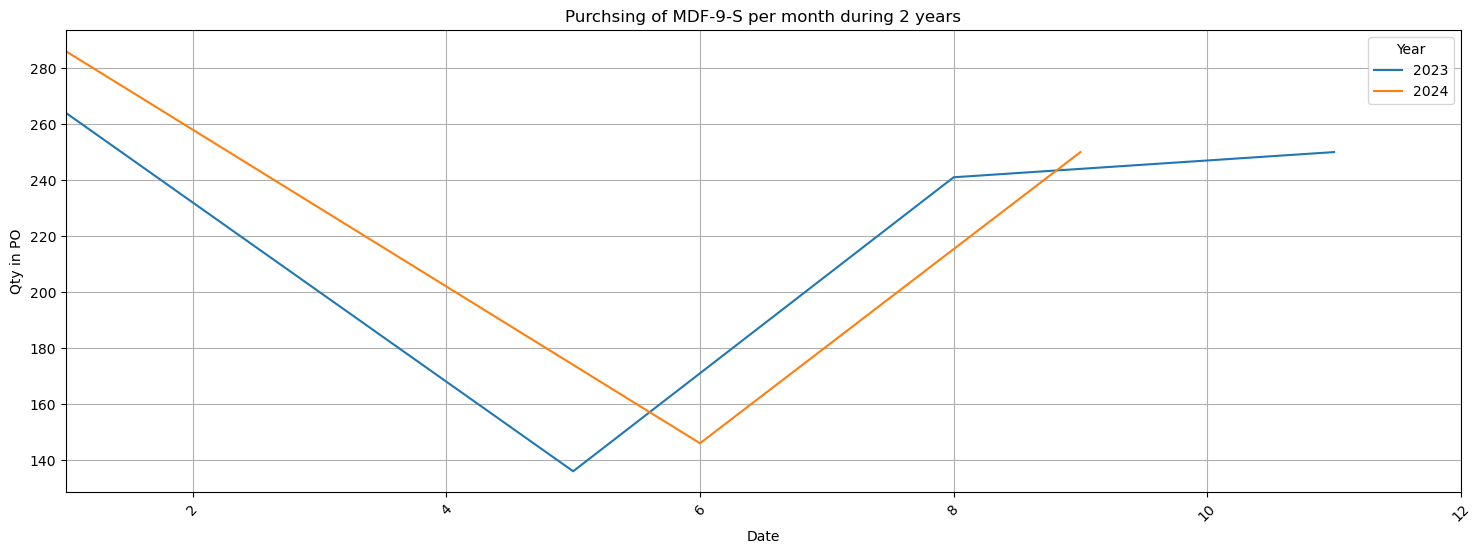

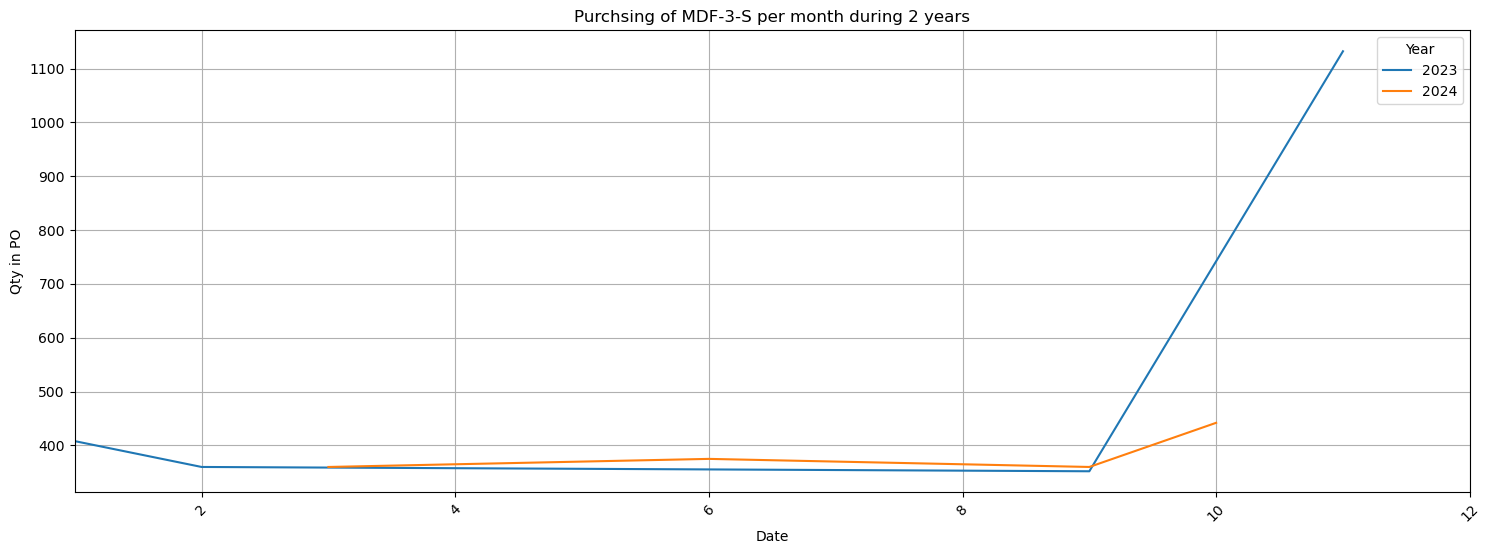

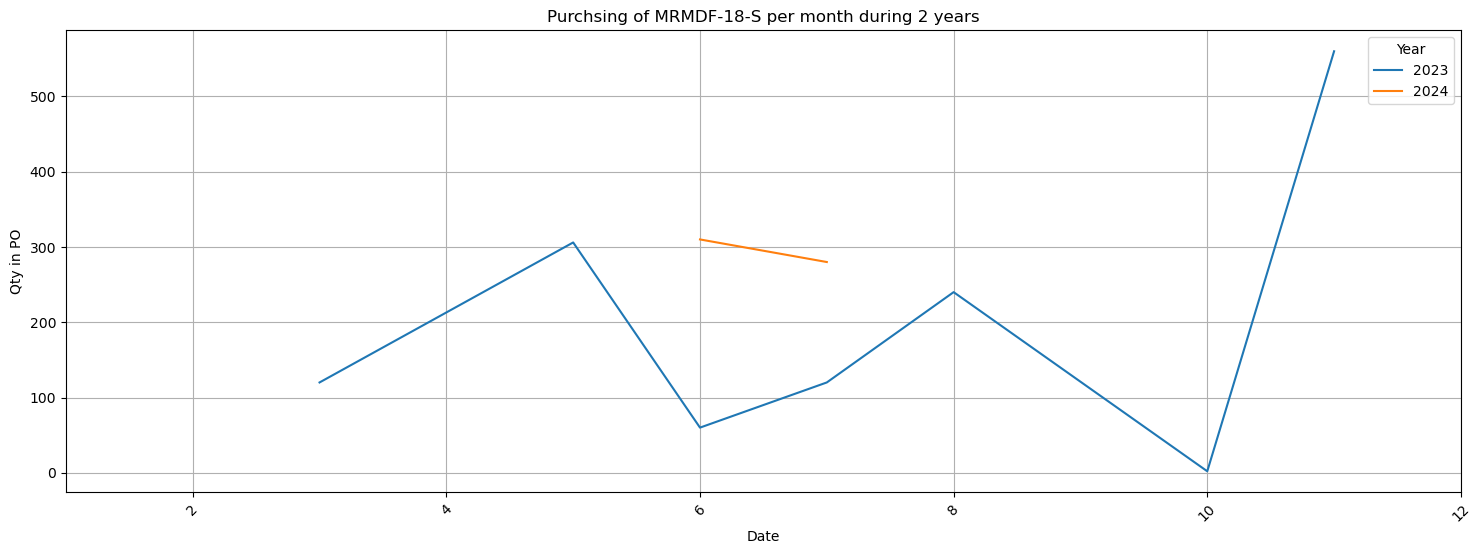

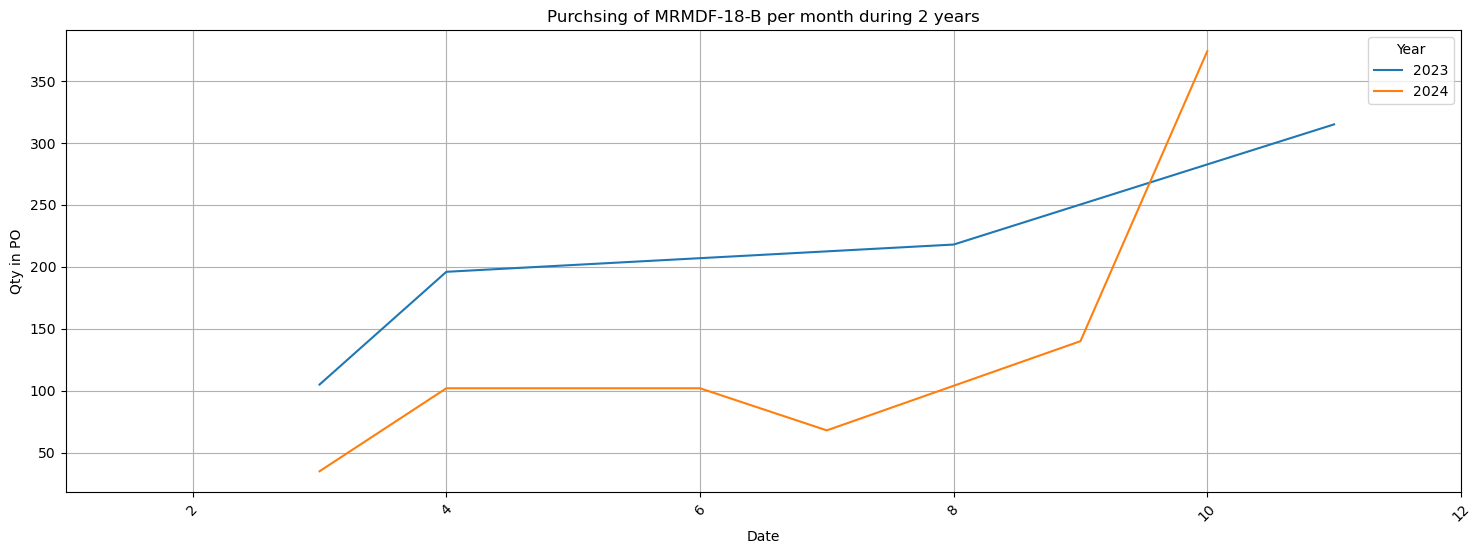

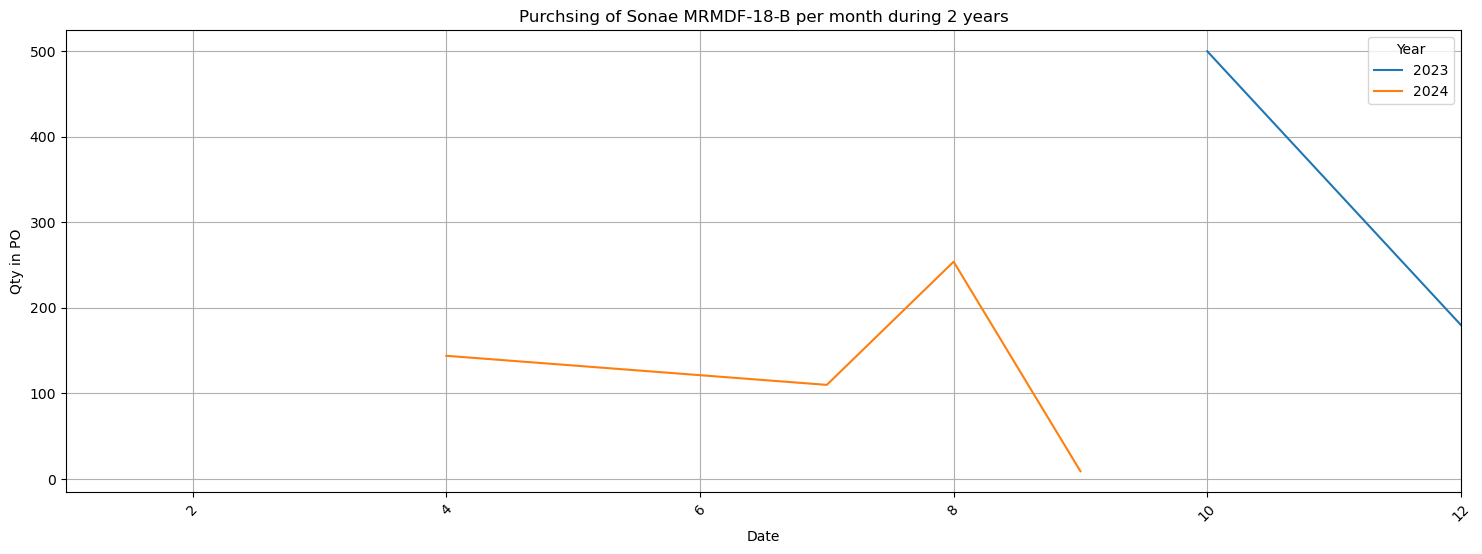

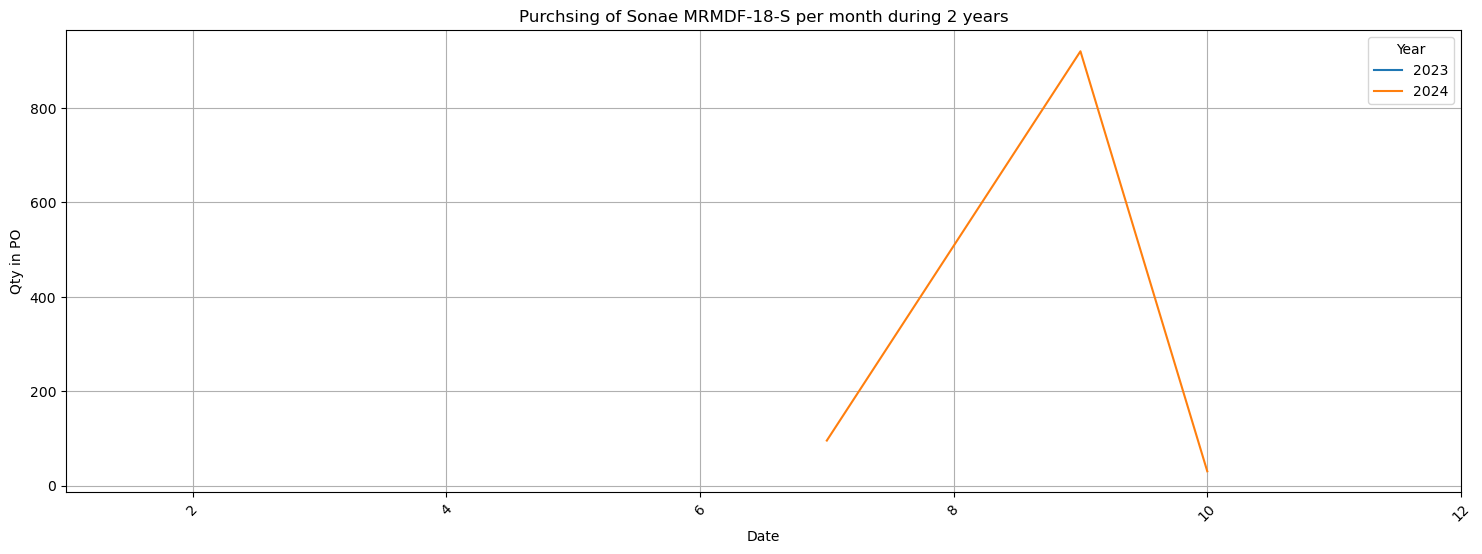

In [18]:
MDF_common_data['Year']= MDF_common_data['Posting_Date'].dt.year
MDF_common_data['Month']= MDF_common_data.Posting_Date.dt.month
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Example colors
for item in mdf_dict.values():
    plt.figure(figsize=(18,6))
    sns.lineplot(data =MDF_common_data[MDF_common_data.Item_name ==item], x= 'Month', y ='Quantity', hue= 'Year',ci=None,
                 estimator= np.sum ,palette=custom_palette )
    plt.title(f'Purchsing of {item} per month during 2 years' ) 
    plt.xticks(rotation=45)
    plt.xlim(1,12)
    plt.xlabel('Date')
    plt.ylabel('Qty in PO')
    plt.grid()
    

##### Solid_wood

In [20]:
sw_dict = {
    '400*22*04 CM خشب شوح رومانى' :'Shuh 4CM',
    '05 CM خشب زان المانى مجفف':'Beechwood 5CM',
     'خشب سويدى رابع': 'Swedish wood fourth' ,
    '05 CM خشب سنديان امريكى مجفف': 'Oak 5CM',
    '08 CM خشب واوة مجفف':'Wawa 8CM',
    '05 CM خشب واوة مجفف':'Wawa 5CM',
    '05 CM خشب موجنو سابلى مجفف':'Mojno 5CM'

}
sw_data, sw_common_codes, sw_merge_code =get_common(car_purchased_item,'Solid Wood', 80 )
sw_common_data = car_purchasing[car_purchasing['Item_No.'].isin(sw_common_codes['Item_No.'])]
sw_common_data = sw_common_data.groupby(['Item_No.','Item_name', 'Categories', 'Posting_Date'])['Quantity'].agg('sum').reset_index()
for key, value in sw_dict.items():
    sw_common_data.Item_name = sw_common_data.Item_name.str.replace(key, value)

print("The Class-A of Solid Wood are: \n")
sw_common_data[['Item_No.', 'Item_name']].drop_duplicates().reset_index(drop=True)


The Class-A of Solid Wood are: 



,Item_No.,Item_name
0,RC-100-101-001,Shuh 4CM
1,RC-100-104-002,Beechwood 5CM
2,RC-100-106-002,Swedish wood fourth
3,RC-100-107-001,Oak 5CM
4,RC-100-111-001,Wawa 8CM
5,RC-100-111-002,Wawa 5CM
6,RC-100-112-002,Mojno 5CM


As usual we will plot all purchasing order for class-A items in one graph so we got if there any relation between them 

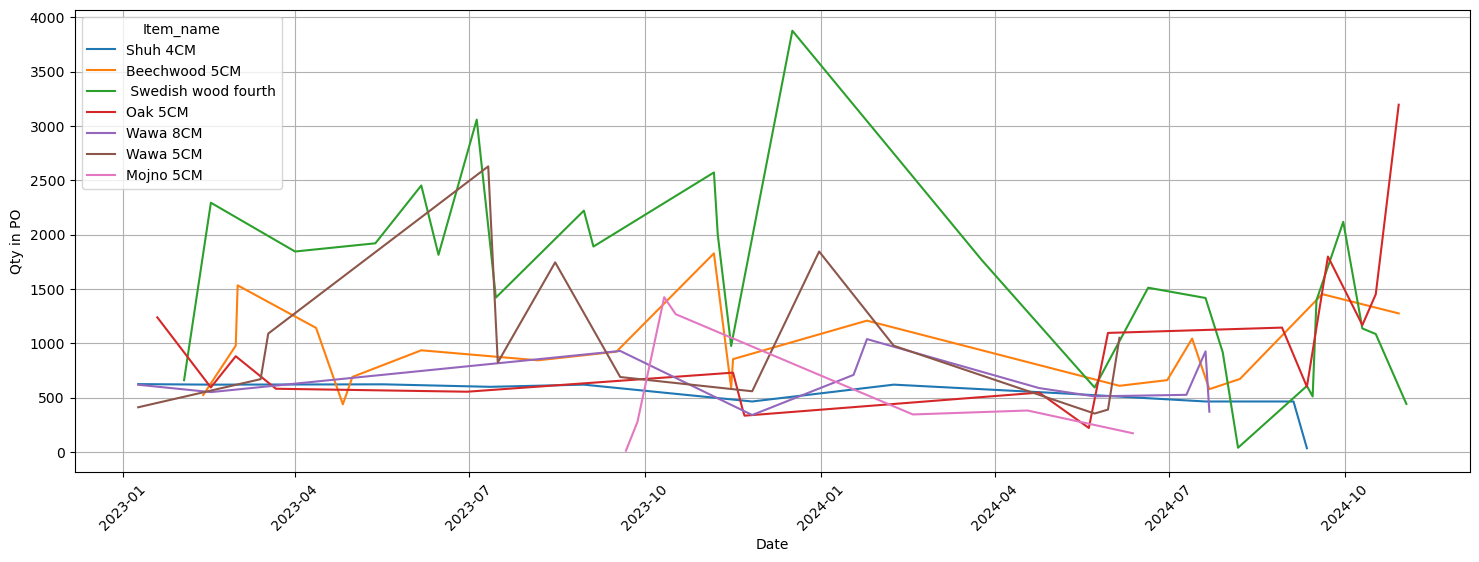

In [21]:
plt.figure(figsize=(18,6))
sns.lineplot(data=sw_common_data, x= 'Posting_Date', y ='Quantity', hue=  'Item_name' )
plt.xlabel('Date')
plt.ylabel('Qty in PO')
plt.xticks(rotation=45)
plt.grid()

then we will plot a graph for each item Vs time, and please remember the best senario small slope in the line

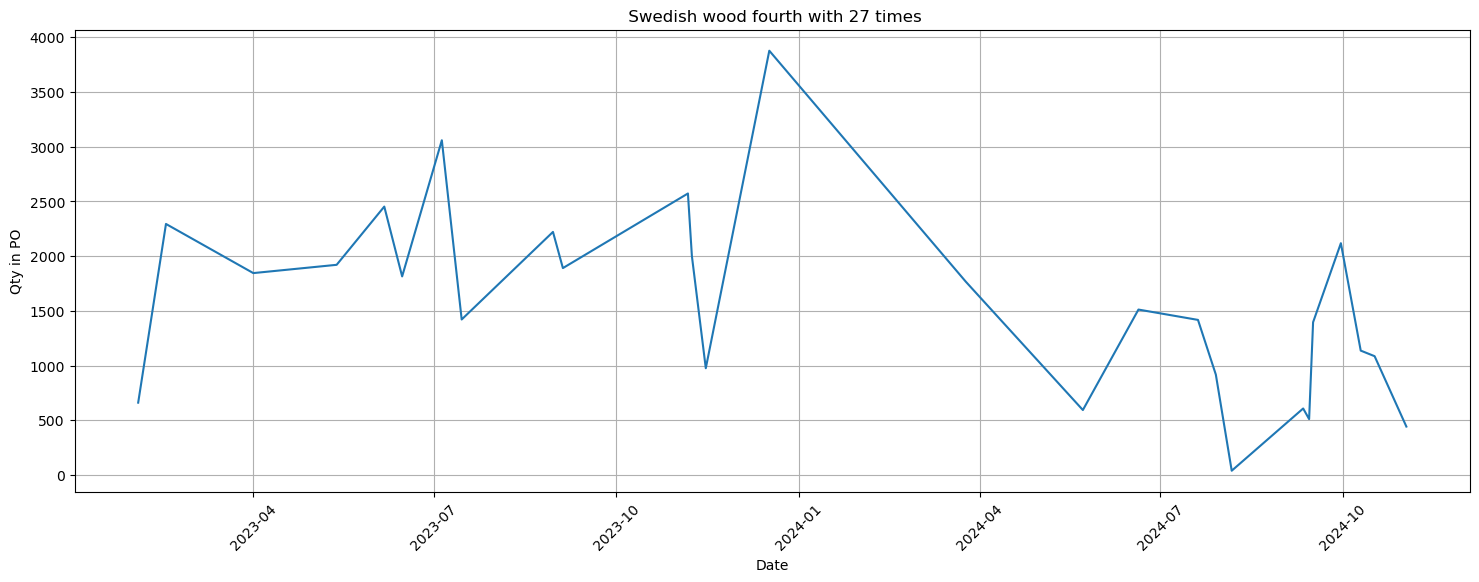

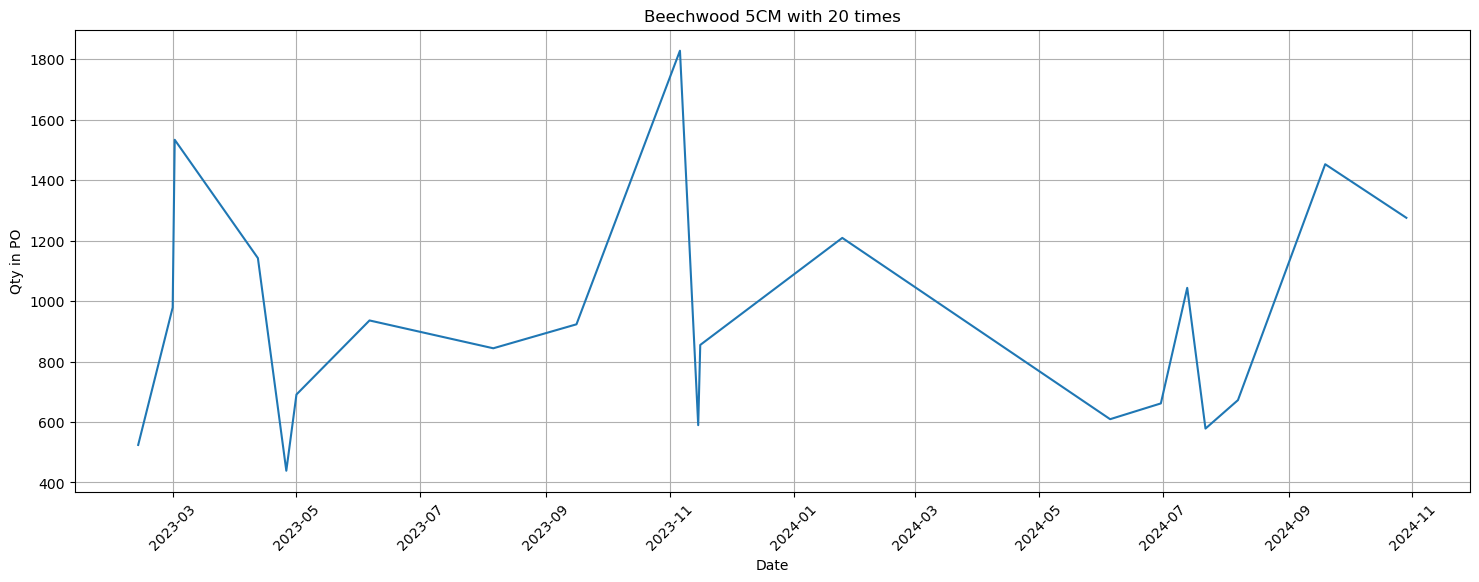

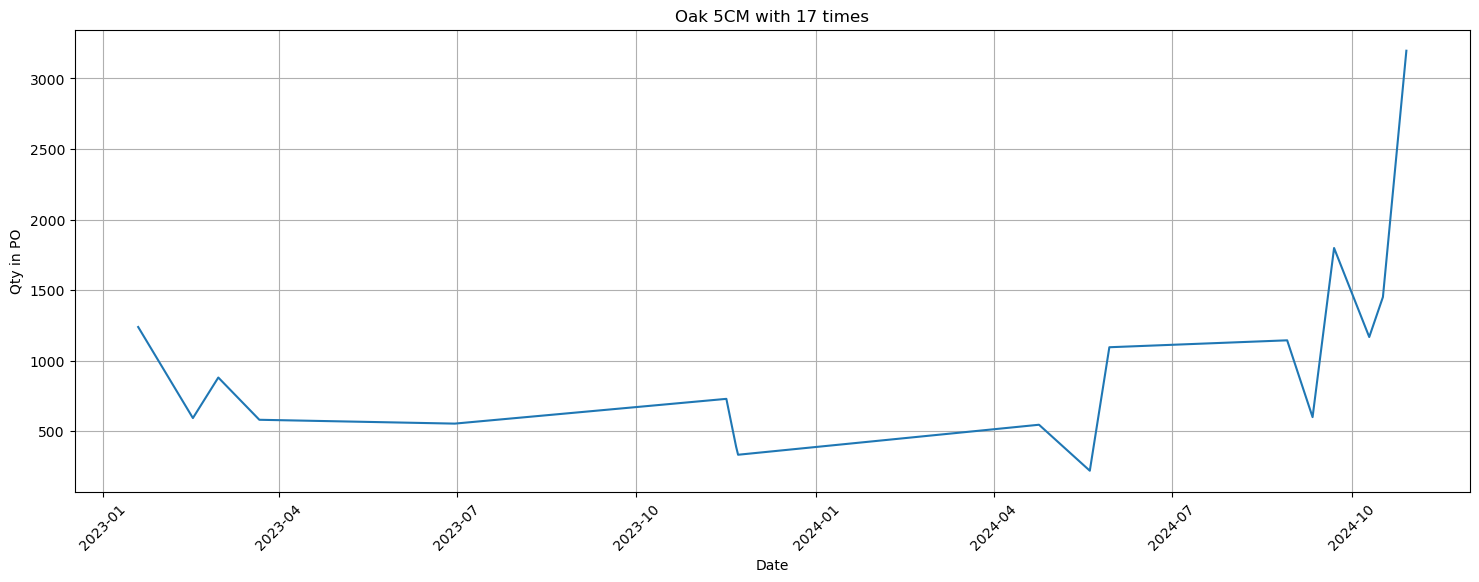

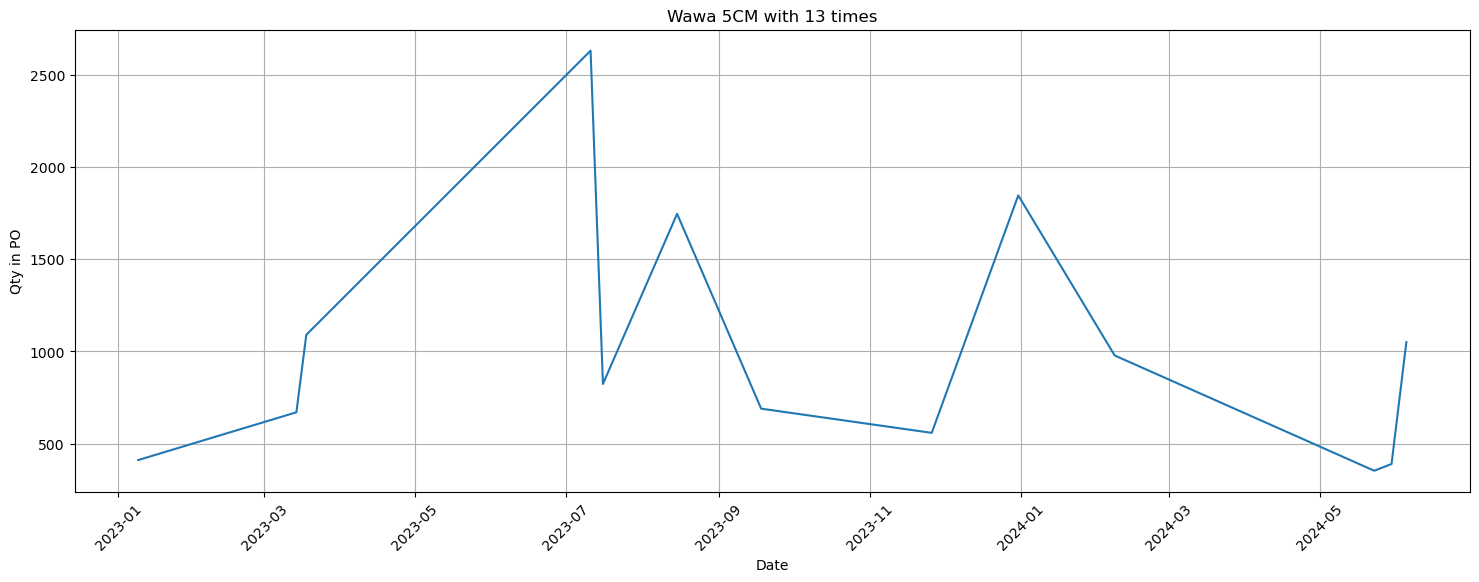

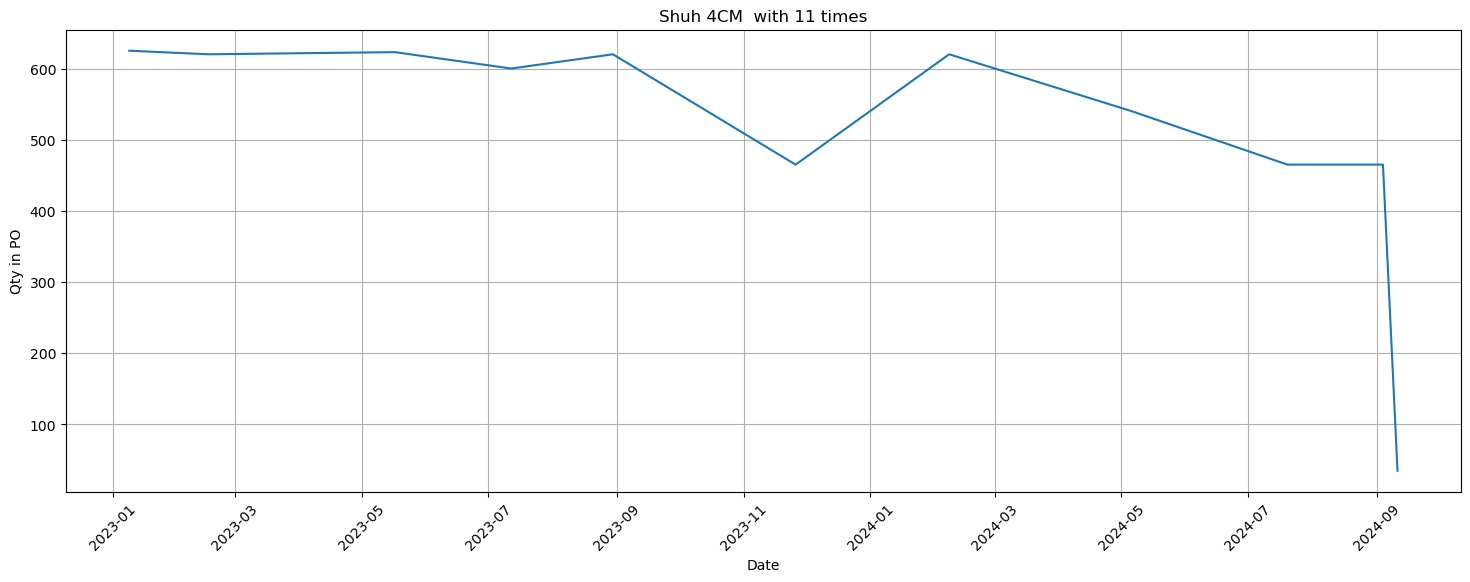

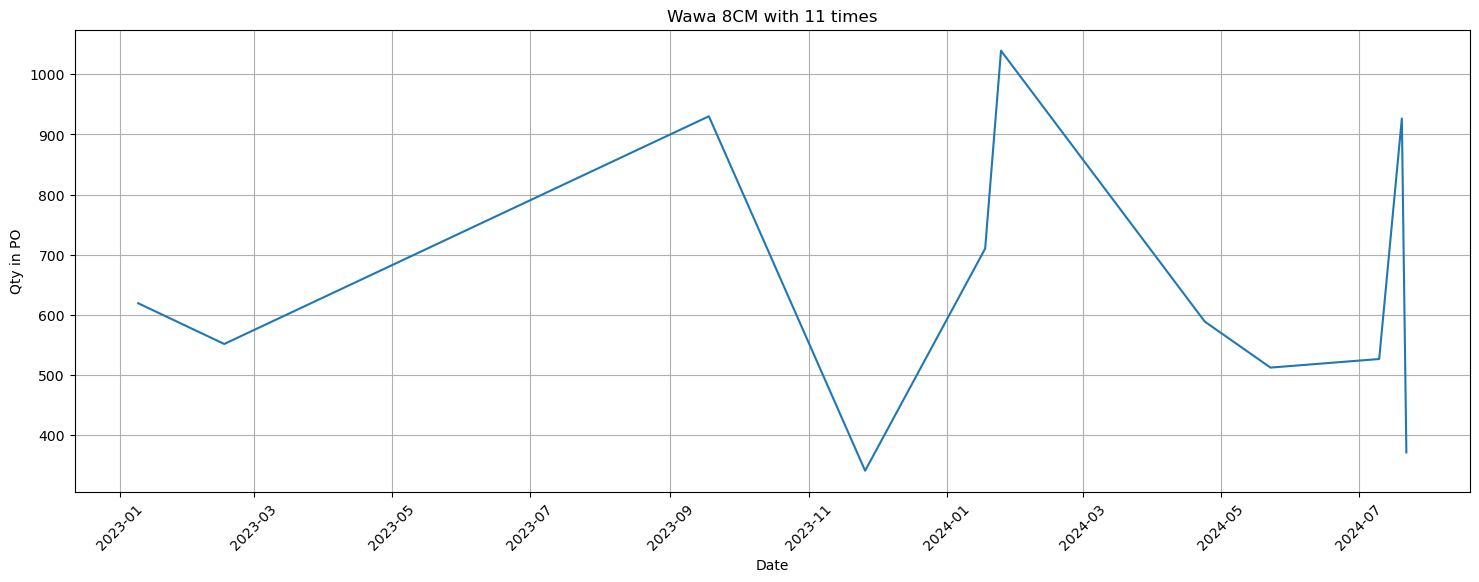

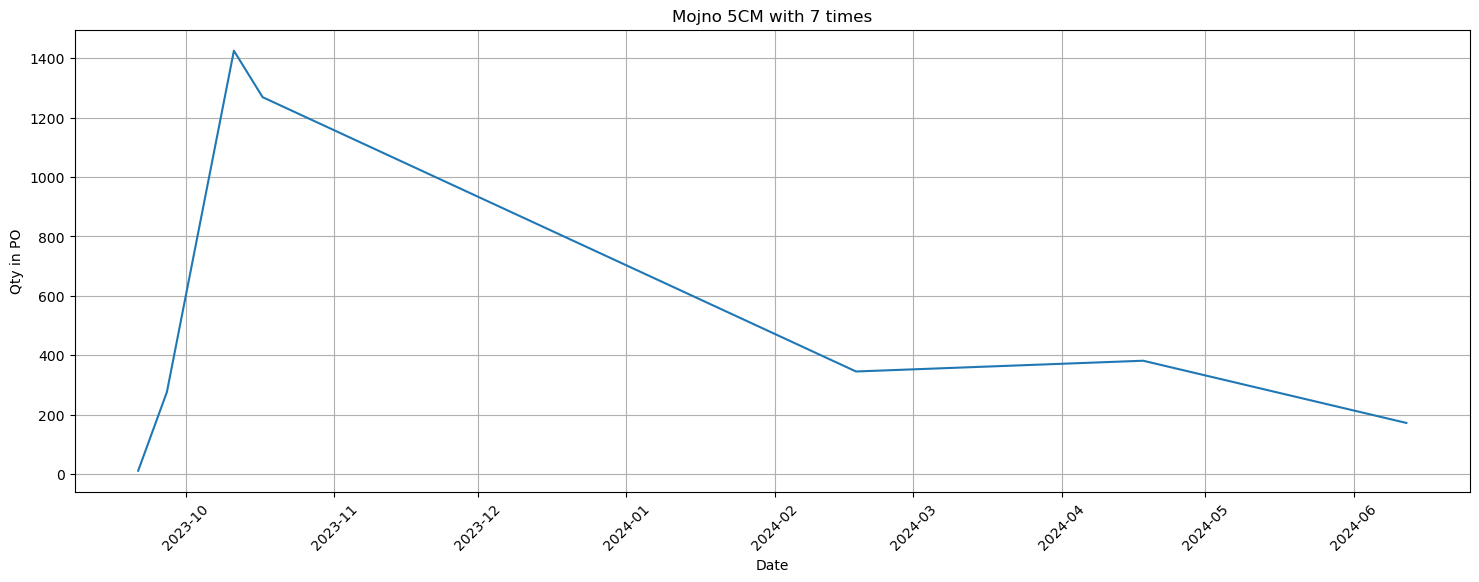

In [22]:
for item in sw_common_data.Item_name.value_counts().index:
    plt.figure(figsize=(18,6))
    sns.lineplot(data =sw_common_data[sw_common_data.Item_name ==item], x= 'Posting_Date', y ='Quantity' )
    plt.title(f'{item} with {sw_common_data[sw_common_data.Item_name ==item].shape[0]} times') 
    plt.xticks(rotation=45) 
    plt.xlabel('Date')
    plt.ylabel('Qty in PO')
    plt.grid()

Let's check the seasonality here too.

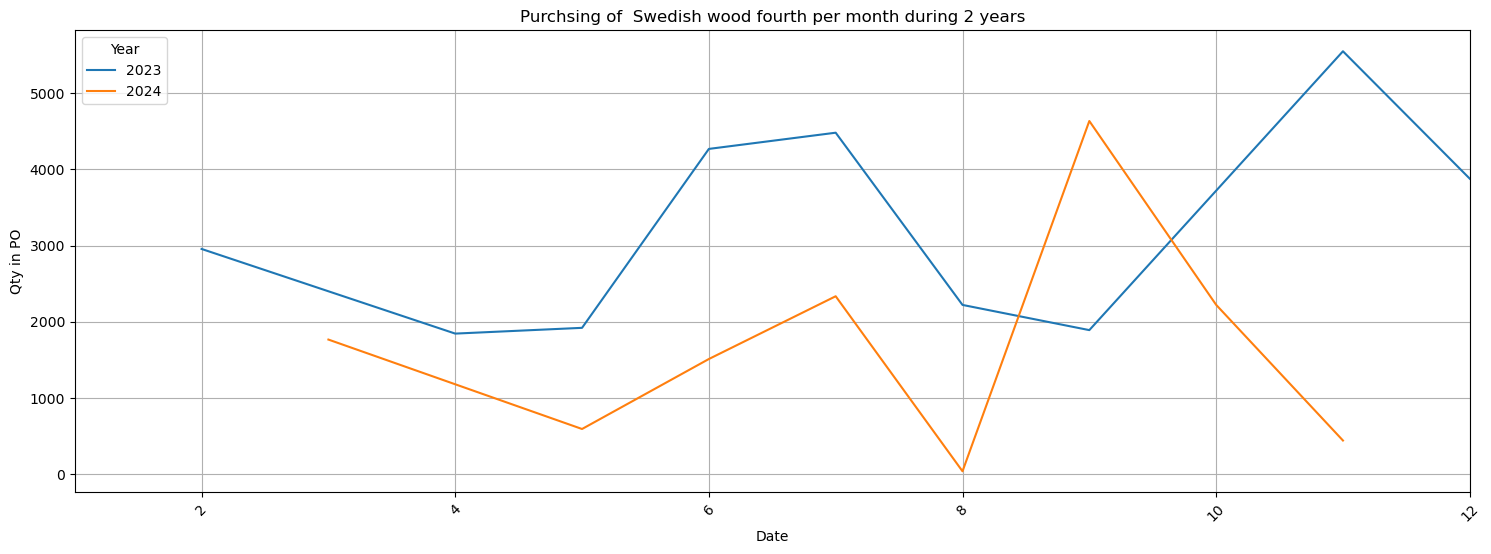

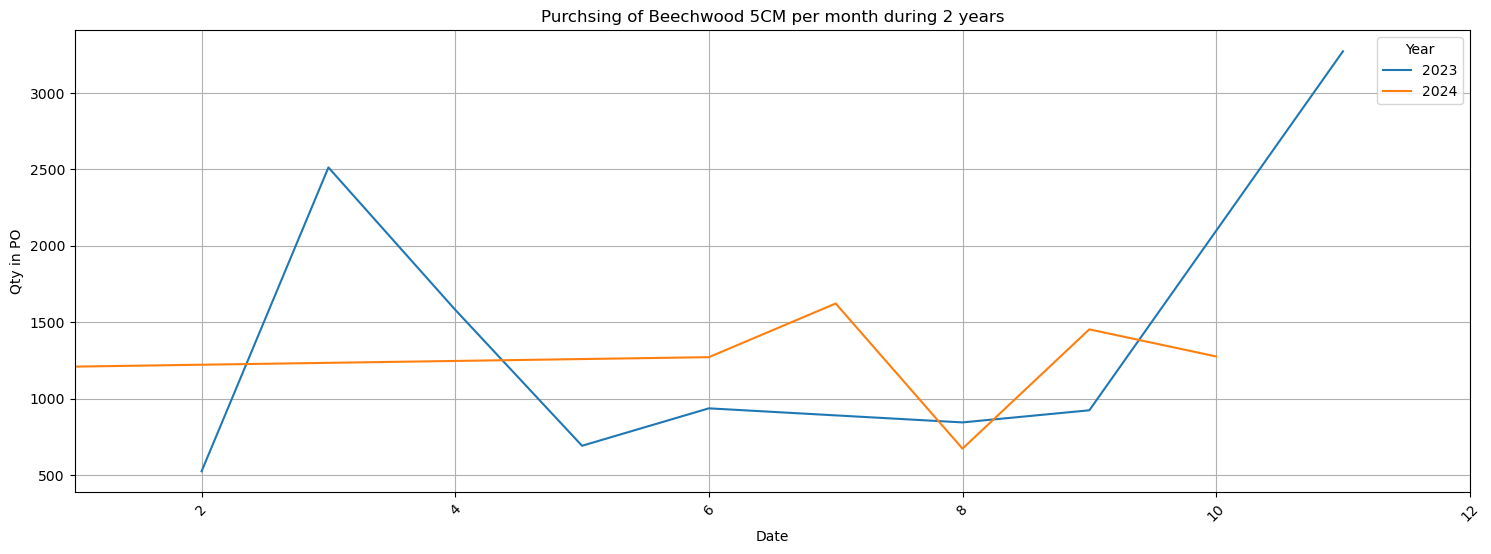

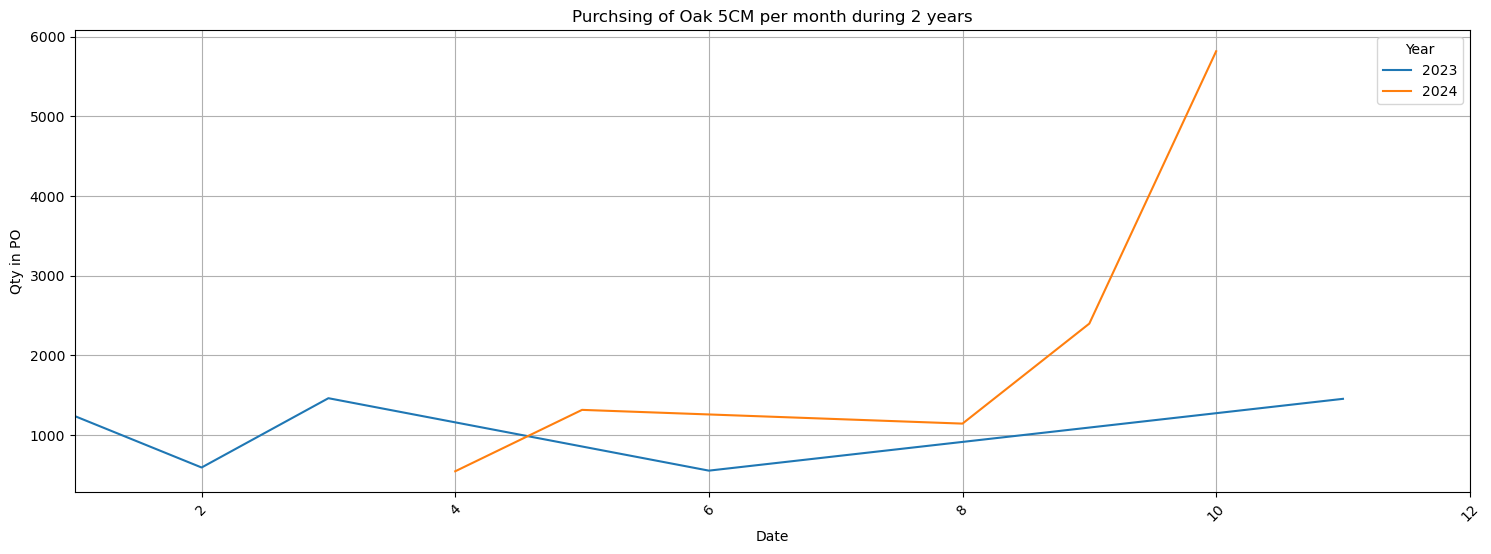

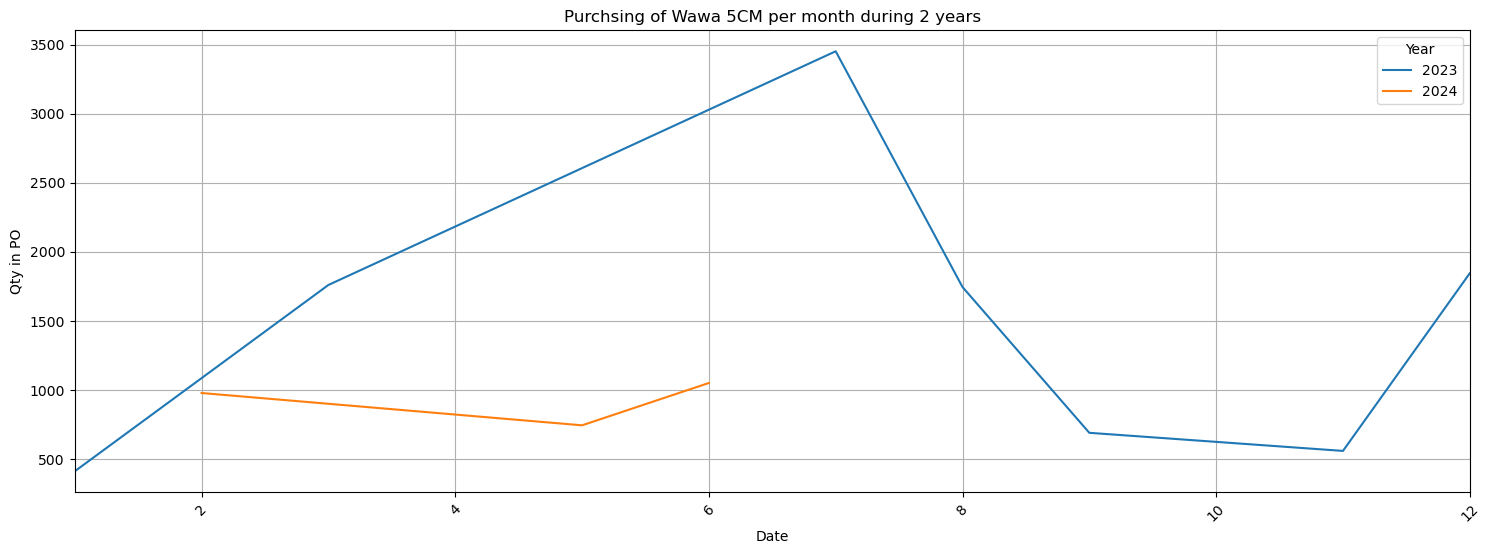

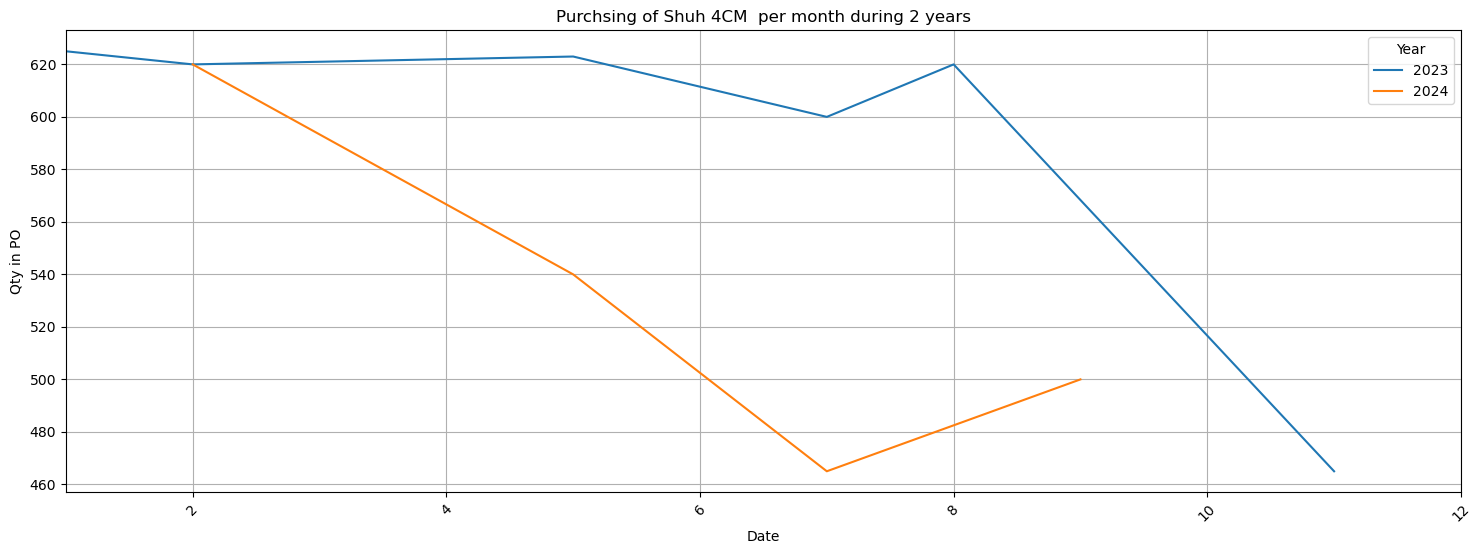

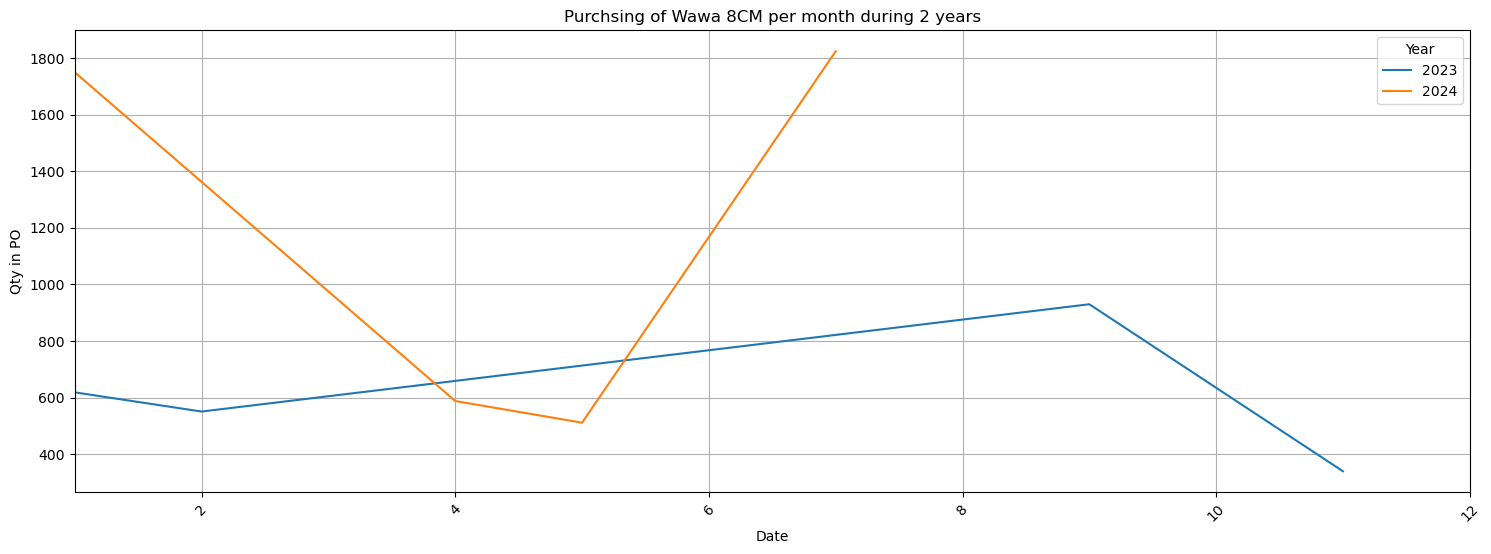

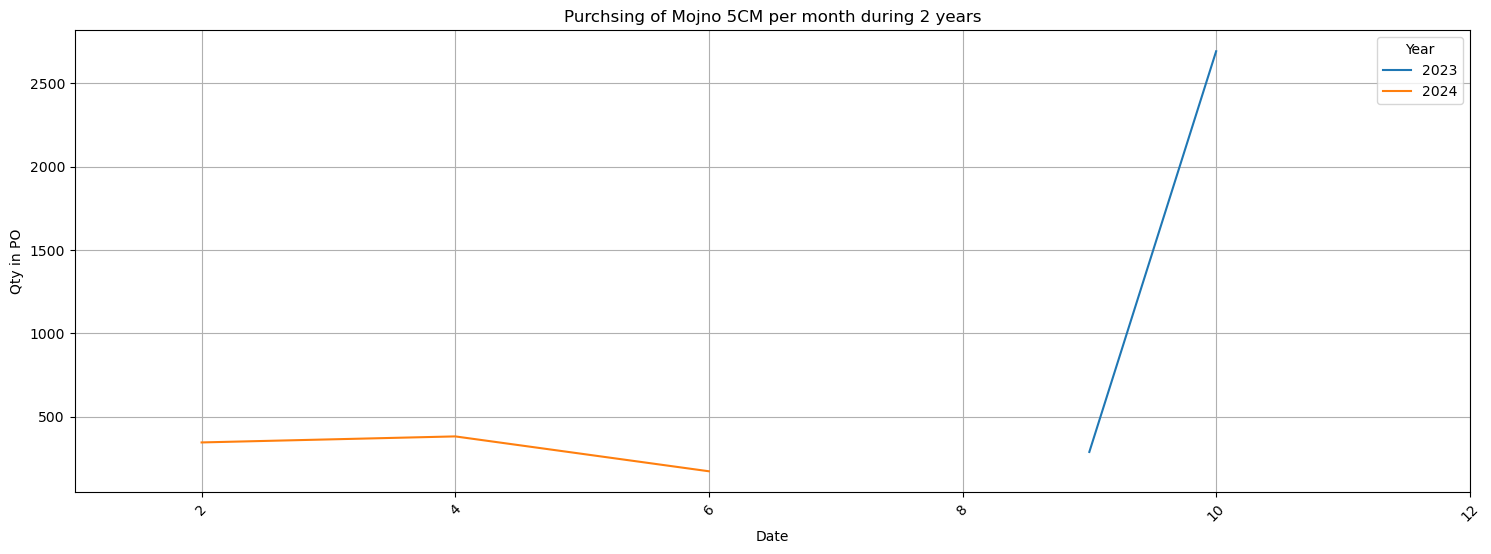

In [23]:
sw_common_data['Year']= sw_common_data['Posting_Date'].dt.year
sw_common_data['Month']= sw_common_data.Posting_Date.dt.month
for item in sw_common_data.Item_name.value_counts().index:
    plt.figure(figsize=(18,6))
    sns.lineplot(data =sw_common_data[sw_common_data.Item_name ==item], x= 'Month', y ='Quantity', hue= 'Year',ci=None,
                 estimator= np.sum ,palette=custom_palette )
    plt.title(f'Purchsing of {item} per month during 2 years' ) 
    plt.xticks(rotation=45)
    plt.xlim(1,12)
    plt.xlabel('Date')
    plt.ylabel('Qty in PO')
    plt.grid()

### 4-Safety Stock and Reorder Point

let's get the definision of Safety Stock, Reorder Point and what effect on them:

#### 1. Average Demand Formula:
The **Average Demand** is calculated as the total demand over a period divided by the number of months in that period. The formula is:

$$
\text{Avg. Daily Demand} = \frac{\text{Total Demand}}{\text{Number of months in Period}}
$$
Where:
- **Total Demand** is the total quantity of items ordered over a specific period (e.g., monthly, quarterly).
- **Number of Days in Period** is the total number of days or weeks in that period.

For example, if the total demand over a 30-day period is 1500 units, the average daily demand would be:

$$
\text{Avg. Daily Demand} = \frac{1500}{30} = 50 \, \text{units/day}
$$

---

#### 2. Standard Deviation of Demand Formula:
The **Standard Deviation** (\( \sigma_d \)) of demand reflects how much demand fluctuates from the average over a given period (e.g., daily, weekly). It’s calculated using the following formula:

$$
\sigma_d = \sqrt{\frac{\sum_{i=1}^{n} (D_i - \bar{D})^2}{n}}
$$

Where:
- $( D_i )$ is the demand on day \(i\),
- $( \bar{D} )$ is the average demand over the period,
- $( n )$ is the number of days (or weeks) in the period.


---

#### 3. Safety Stock Formula:
The formula for calculating **Safety Stock** is:

$$
\text{Safety Stock} = Z \times \sigma_d \times \sqrt{L}
$$

Where:
- $( Z )$: Service level factor (z-score, e.g., \(1.645\) for \(95\%\) service level)
- $( \sigma_d )$: Standard deviation of demand during the lead time
- $( L )$: Lead time months

---

#### 4. Reorder Point Formula:
The formula for calculating **Reorder Point (ROP)** is:

$$
\text{Reorder Point (ROP)} = (\text{Average Daily Demand} \times L) + \text{Safety Stock}
$$

Where:
- $( \text{Average Daily Demand} )$: The mean demand per day or week
- $( L )$: Lead time months
- $( \text{Safety Stock} )$: As calculated above


#### ROP for MDF 

In [65]:
mdf_inventory_transactions = pd.read_excel("Transaction Detail for 23&24  at 21 Nov 24.xlsx", sheet_name=None)
sw_inventory_transactions = pd.read_excel("SW Transaction Detail for 23&24  at 21 Nov 24.xlsx", sheet_name=None)


In [89]:
Service_level = 1.64 # for 80% customer satisfaction 
ST_lead_time  = 1 
Lead_Time  = 0.33 

def make_cal(data):
    data['Posting Date'] = pd.to_datetime(data['Posting Date'])
    data = data[data['Entry Type']== 'Consumption']
    data['M/Y'] = pd.to_datetime({'year':  data['Posting Date'].dt.year,
                           'month':data['Posting Date'].dt.month  ,
                           'day': 1})
    data = data.groupby(by=['M/Y'])['Decreases'].agg('sum')
    data = data.resample('MS').asfreq().fillna(0)
    return data
    

def cal_ss( sigma ,z=Service_level, l=Lead_Time):
    ss= z*sigma*l
    return ss

def cal_ROP(average, lead_time, ss):
    return (average*lead_time)+ss

In [90]:
MDF_data = []
for sheet_name, data in mdf_inventory_transactions.items():
    data = make_cal(data)
    if data.size >1:
        ave = data.mean()
        std = data.std()
        ss = round(cal_ss(std))
        ROP = round(cal_ROP(ave,Lead_Time, ss))
        MDF_data.append({
            'Code':sheet_name,
            'Item_name':MDF_common_data[MDF_common_data["Item_No."] ==sheet_name]["Item_name"].values[0],
            'average':ave,
            'standard_deviation':std,
            'Safety_stock':ss,
            'ROP':ROP
        })
       
ROP_MDF_common_data = pd.DataFrame(MDF_data)
ROP_MDF_common_data

,Code,Item_name,average,standard_deviation,Safety_stock,ROP
0,RC-101-100-006,MDF-22-S,72.412955,100.610334,54,78
1,RC-101-100-007,MDF-18-B,208.529578,221.533948,120,189
2,RC-101-100-008,MDF-18-S,286.610572,218.630697,118,213
3,RC-101-100-009,MDF-12-B,38.011990,31.407425,17,30
4,RC-101-100-010,MDF-12-S,75.700035,56.510753,31,56
5,RC-101-100-011,MDF-9-B,27.083043,15.113050,8,17
6,RC-101-100-012,MDF-9-S,62.703865,30.234504,16,37
7,RC-101-100-015,MDF-3-S,130.182174,78.396097,42,85
8,RC-101-102-001,MRMDF-18-S,87.137326,74.702702,40,69
9,RC-101-102-002,MRMDF-18-B,52.217392,53.722196,29,46


#### ROP for Solid Wood 

In [91]:
SW_data = []
for sheet_name, data in sw_inventory_transactions.items():
    data = make_cal(data)
    if data.size >1:
        ave = data.mean()
        std = data.std()
        ss = round(cal_ss(std))
        ROP = round(cal_ROP(ave,Lead_Time, ss))
        SW_data.append({
            'Code':sheet_name,
            'Item_name':sw_common_data[sw_common_data["Item_No."] ==sheet_name]["Item_name"].values[0],
            'average':ave,
            'standard_deviation':std,
            'Safety_stock':ss,
            'ROP':ROP
        })
       
ROP_SW_common_data = pd.DataFrame(SW_data)
ROP_SW_common_data

,Code,Item_name,average,standard_deviation,Safety_stock,ROP
0,RC-100-101-001,Shuh 4CM,245.815217,125.950737,68,149
1,RC-100-104-002,Beechwood 5CM,780.204194,809.179161,438,695
2,RC-100-106-002,Swedish wood fourth,1552.439296,1319.091304,714,1226
3,RC-100-107-001,Oak 5CM,292.196818,471.697419,255,351
4,RC-100-111-001,Wawa 8CM,343.051450,609.294061,330,443
5,RC-100-111-002,Wawa 5CM,498.472066,752.283437,407,571
6,RC-100-112-002,Mojno 5CM,154.781250,361.289587,196,247
